# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
    \nabla_{\omega}Q=-\frac{2}{\ell}(y-X\omega)^TX
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

In [1]:
import numpy as np

np.sqrt(2)

1.4142135623730951

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

In [2]:
a = np.array([1, 2, 3])
a = 5
np.square(np.linalg.norm(a))

25.0

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [5]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [6]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [7]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

KeyboardInterrupt: 

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [4]:
import scipy as sp

In [5]:
data = pd.read_csv('autos.csv')

In [7]:
data.sample(10)

brand   model vehicleType    gearbox fuelType  \
239698     mitsubishi    colt  kleinwagen    manuell   benzin   
132744     volkswagen    golf   limousine    manuell   benzin   
127321        renault  twingo  kleinwagen    manuell   benzin   
57732            audi      a3   limousine    manuell   benzin   
32771            opel   corsa  kleinwagen    manuell   benzin   
75267         citroen      c2  kleinwagen    manuell   benzin   
222663           audi      a4       kombi    manuell   diesel   
235072            bmw     3er       kombi  automatik   diesel   
25933   mercedes_benz  andere       coupe  automatik   diesel   
202075     volkswagen    golf   limousine    manuell   diesel   

       notRepairedDamage  powerPS  kilometer  autoAgeMonths  price  
239698              nein      150     150000            126   3200  
132744              nein       75     150000            222    600  
127321              nein       54     150000            248    999  
57732               nein      218     100000             87   9900  
32771               nein       75     150000            146   1999  
75267               nein       73      40000             79   4650  
222663              nein      110     150000            217   2900  
235072              nein      163     150000            110   9650  
25933               nein      265     150000             53  28950  
202075              nein      140     150000             46  10000

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [5]:
data['notRepairedDamage'].unique()

array(['nein', 'ja'], dtype=object)

In [6]:
data.dtypes

brand                object
model                object
vehicleType          object
gearbox              object
fuelType             object
notRepairedDamage    object
powerPS               int64
kilometer             int64
autoAgeMonths         int64
price                 int64
dtype: object

In [6]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []
target = ['price']

# YOUR CODE (EDA):

In [11]:
for col in categorical:
    print(data[col].value_counts())

brand
volkswagen       49087
bmw              29194
mercedes_benz    25465
audi             23891
opel             23809
ford             15809
renault          10523
peugeot           7284
fiat              5664
skoda             4372
seat              4352
mazda             3819
toyota            3523
citroen           3375
nissan            3282
mini              2797
hyundai           2664
smart             2575
volvo             2447
mitsubishi        1939
kia               1838
honda             1838
porsche           1679
alfa_romeo        1620
suzuki            1553
chevrolet         1229
chrysler           944
dacia              690
land_rover         600
jeep               568
subaru             516
jaguar             456
daihatsu           420
saab               407
lancia             295
daewoo             295
rover              244
lada               127
Name: count, dtype: int64
model
golf               20071
andere             18280
3er                14985
a4           

In [7]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

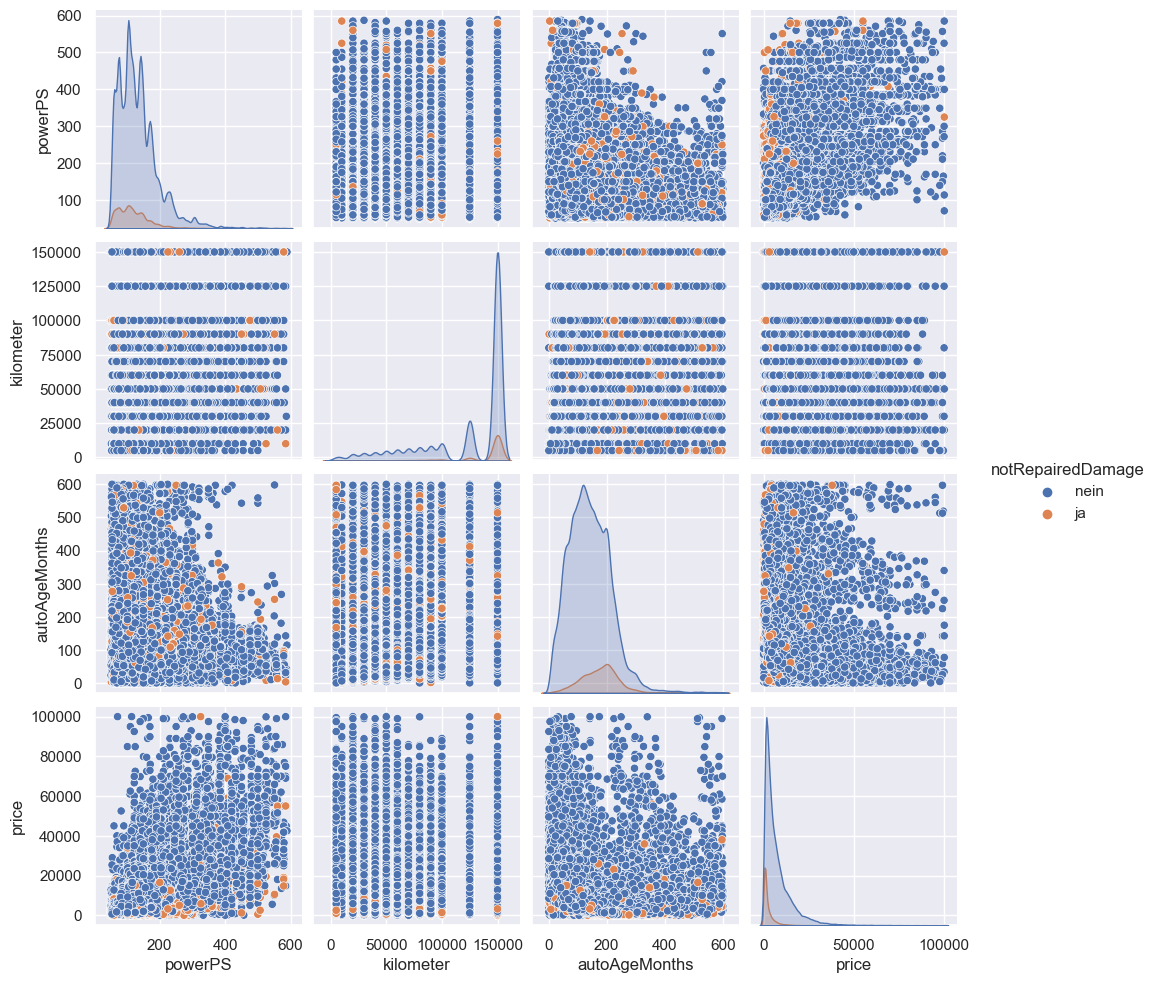

In [13]:
sns.pairplot(data[numeric + target + categorical], diag_kind='kde', hue='notRepairedDamage')

In [14]:
data[numeric + target].describe()

powerPS      kilometer  autoAgeMonths          price
count  241190.000000  241190.000000  241190.000000  241190.000000
mean      131.271628  123766.677723     144.768676    6887.741892
std        60.622613   39825.955933      73.092598    8024.451993
min        51.000000    5000.000000       1.000000       1.000000
25%        90.000000  100000.000000      92.000000    1750.000000
50%       120.000000  150000.000000     140.000000    4100.000000
75%       160.000000  150000.000000     192.000000    8999.000000
max       589.000000  150000.000000     600.000000   99999.000000

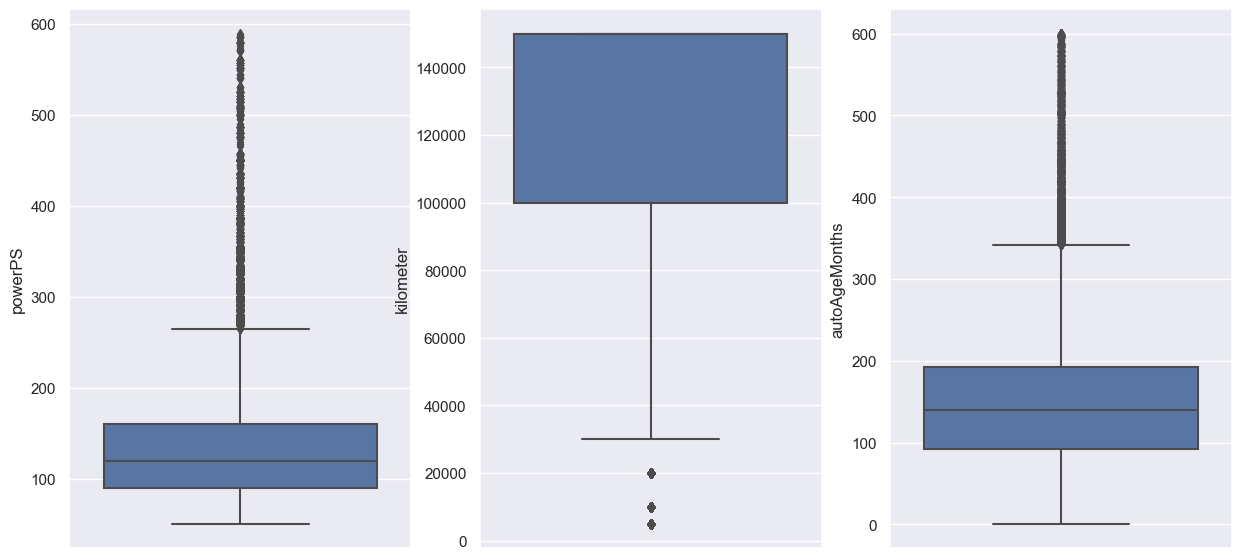

In [15]:
plt.figure(figsize=(15, 7))

for i, col in enumerate(numeric):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=data[col])

## Попробуем обработать скошенность (skewness) данных

### log преобразование

In [16]:
data_loged = np.log(data[numeric])

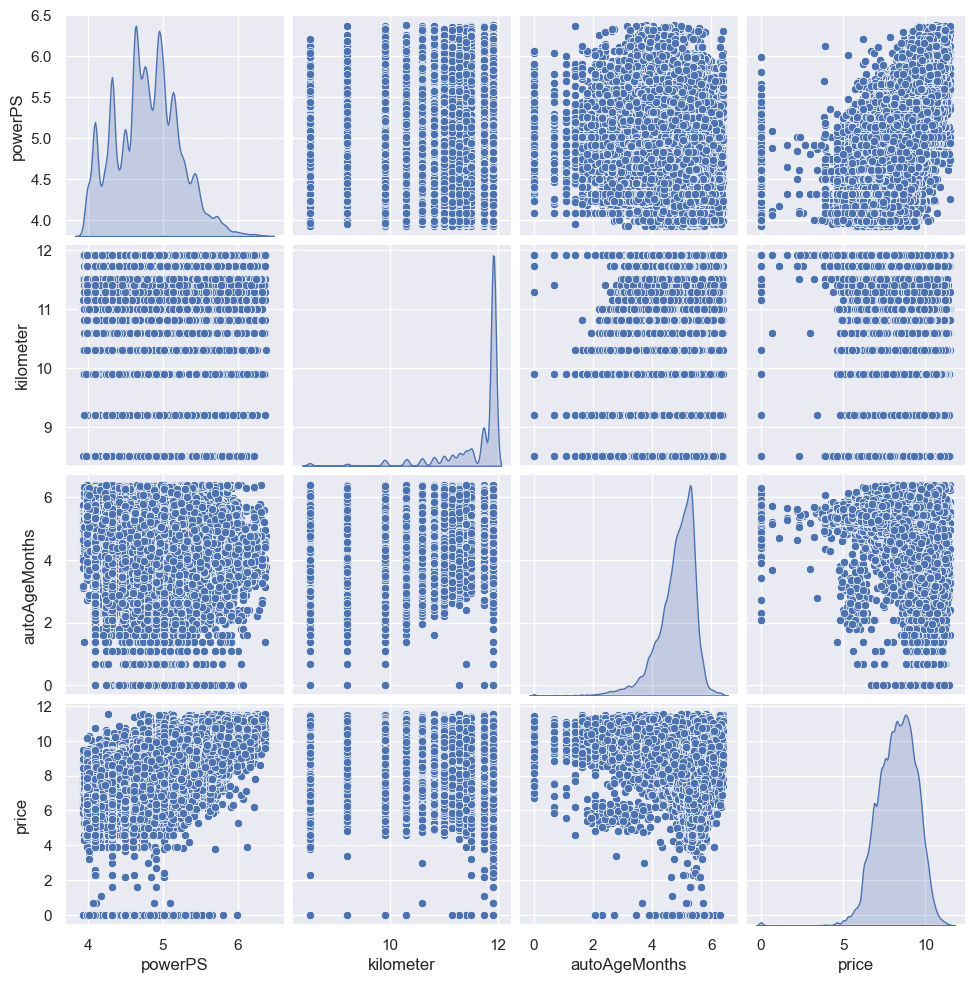

In [17]:
sns.pairplot(data_loged, diag_kind='kde')

## Кубический корень / квадратный корень

Преобразуем как признаки, так и целевую переменную:

In [18]:
data_sqrt = np.sqrt(data[numeric + target])
data_cbrt = np.cbrt(data[numeric + target])

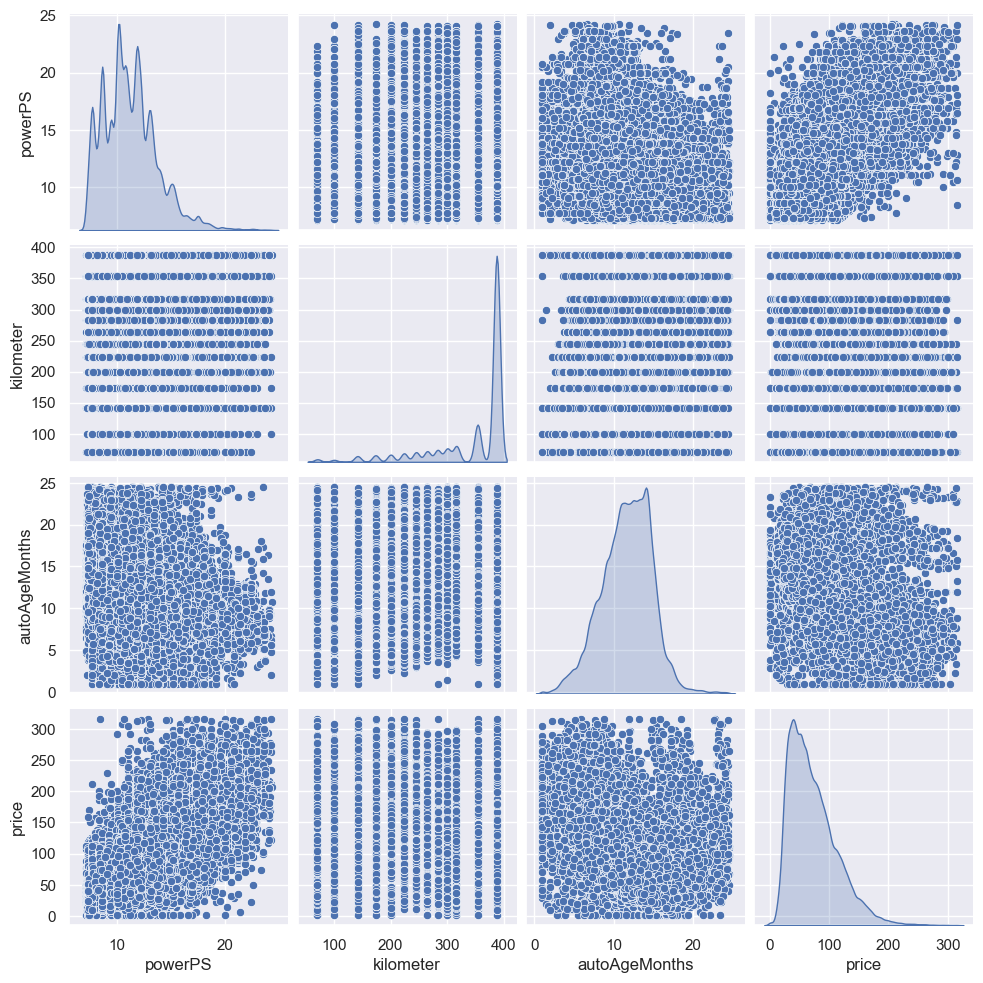

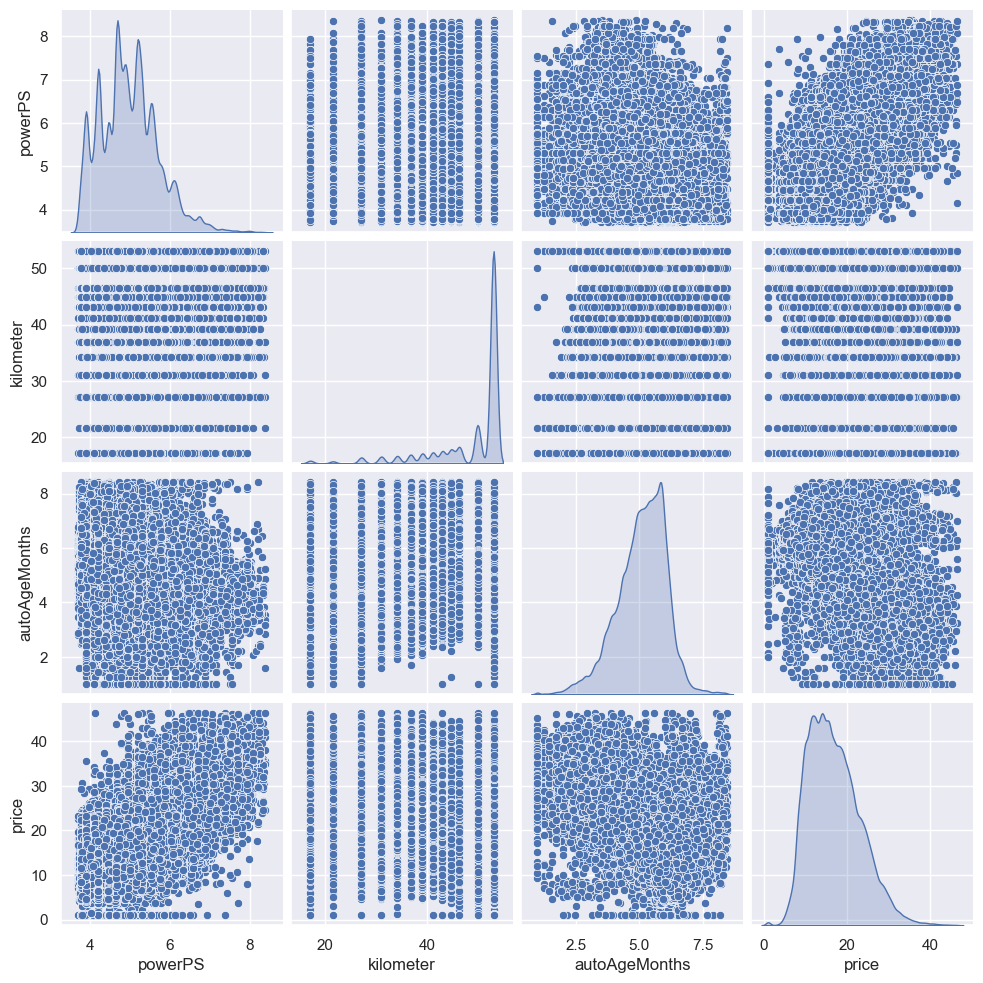

In [64]:
sns.pairplot(data_sqrt, diag_kind='kde')
sns.pairplot(data_cbrt, diag_kind='kde')

Видно, что между price и powerPS присутствует прямо пропорциональная зависимость. При этом их графики распределения похожи. Но также похож график непреобразованного autoAgeMonth. Посмотрим на зависимость autoAgeMonths и cbrt(price)

In [19]:
data1 = pd.DataFrame({'autoAgeMonths': data['autoAgeMonths'], 
                      'price': data_cbrt['price']})

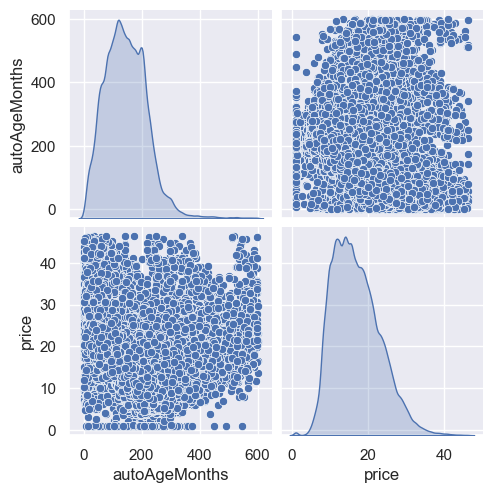

In [78]:
sns.pairplot(data1, diag_kind='kde')

ожидания не сильно оправдались(( хотя лучше посмотреть ковариацию на heatmap

In [82]:
data1.corr()

autoAgeMonths    price
autoAgeMonths        1.00000 -0.62977
price               -0.62977  1.00000

Теперь преобразуем только признаки 

In [27]:
data_cbrt_f = np.cbrt(data[numeric])
data_cbrt_f[target] = data[target]

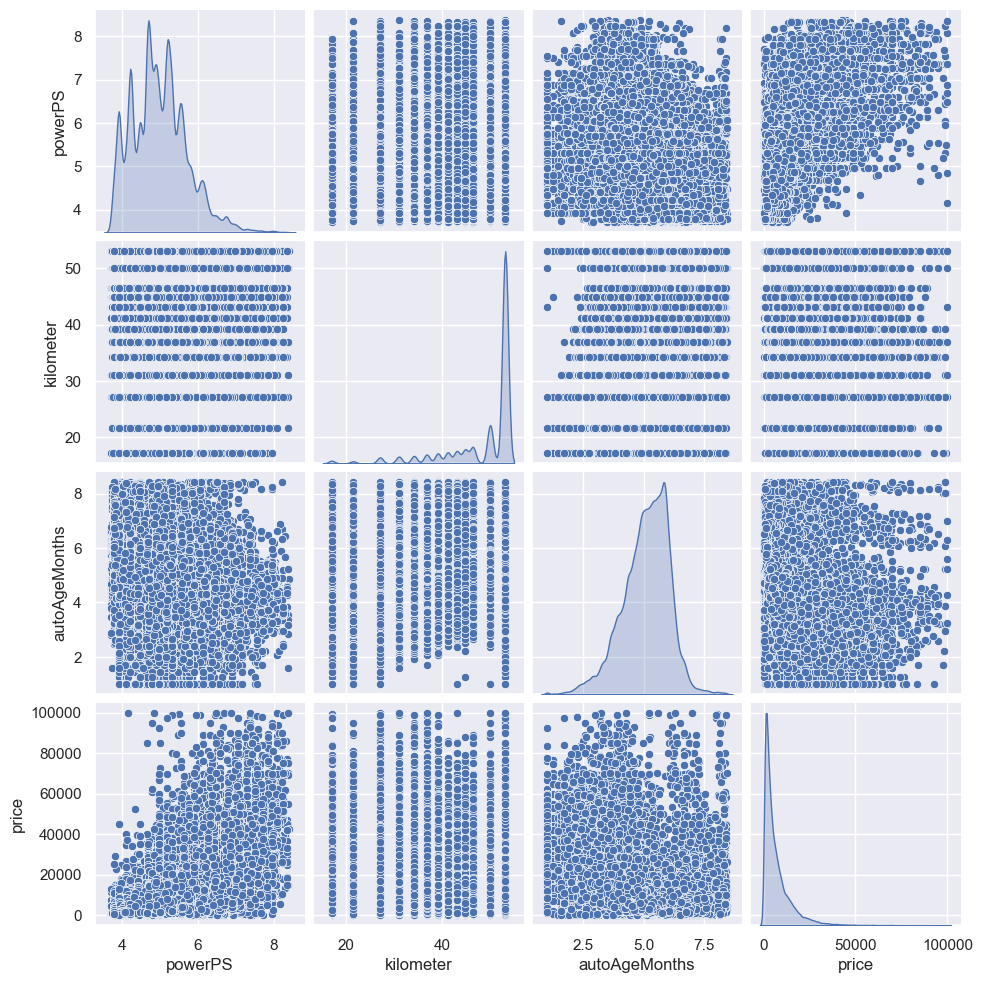

In [28]:
sns.pairplot(data_cbrt_f, diag_kind='kde')

## Трансформация Бокса-Кокса

In [20]:
data_boxcox = pd.DataFrame()
for col in numeric + target:
    data_boxcox[col] = sp.stats.boxcox(data[col])[0]

In [21]:
data_boxcox.head()

powerPS     kilometer  autoAgeMonths      price
0  2.960484  3.618464e+12      33.330433  12.043168
1  2.923058  1.007355e+12      22.369207  14.381795
2  3.093556  3.618464e+12      40.742580  10.038964
3  3.121290  3.618464e+12      28.853336  13.034413
4  3.105711  3.618464e+12      28.341217  12.783221

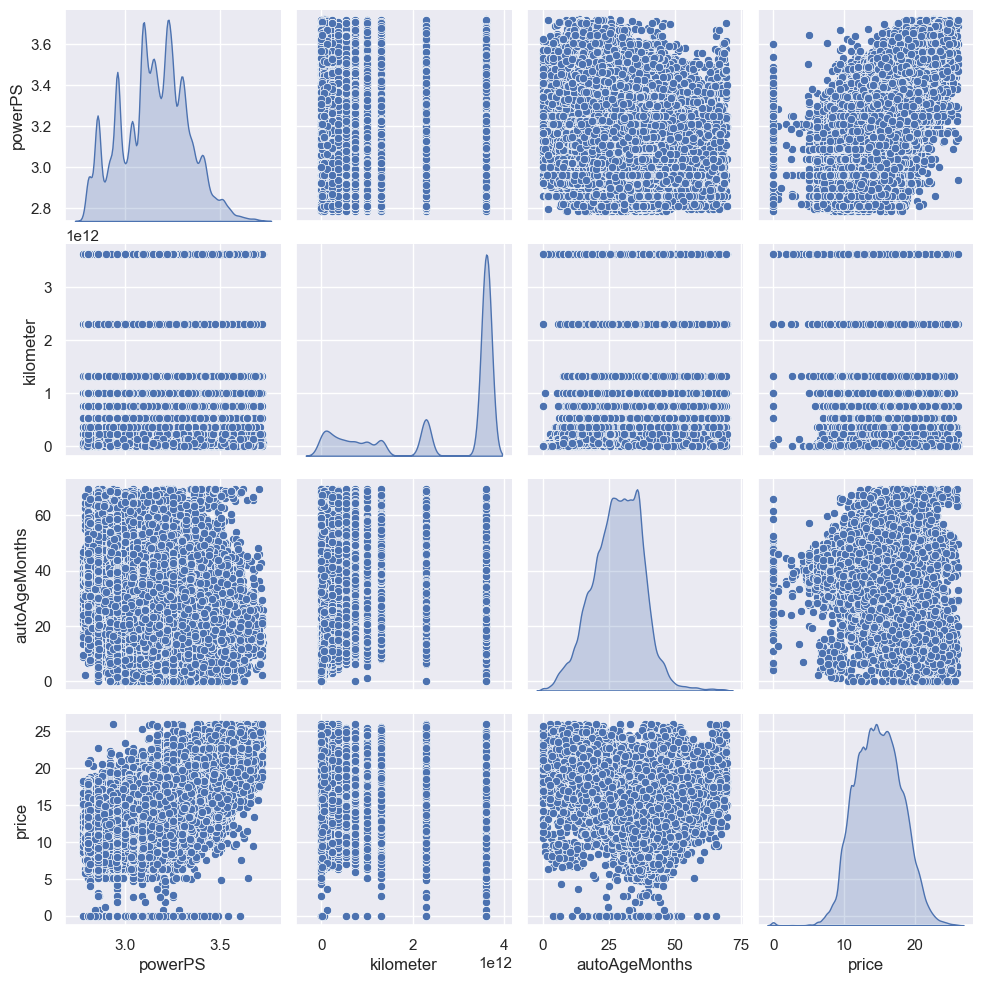

In [104]:
sns.pairplot(data_boxcox, diag_kind='kde')

Text(0.5, 1.0, 'boxcox')

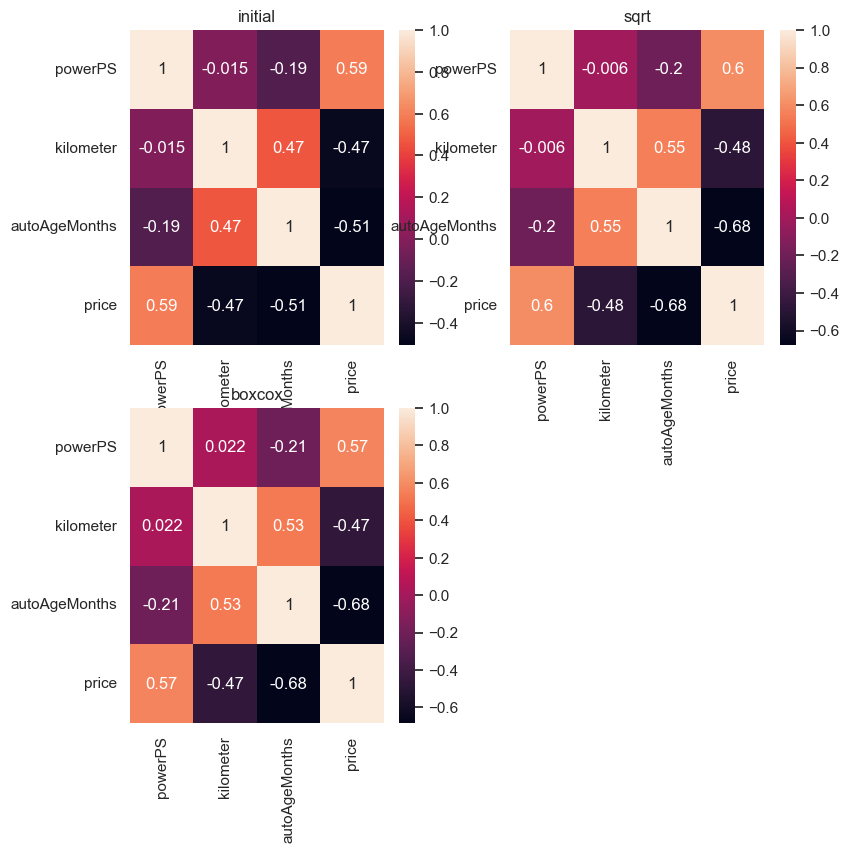

In [26]:
plt.figure(figsize=(9, 9))

plt.subplot(2, 2, 1)
sns.heatmap(data[numeric + target].corr(), annot=True)
plt.title('initial')

plt.subplot(2, 2, 2)
sns.heatmap(data_sqrt.corr(), annot=True)
plt.title('sqrt')

plt.subplot(2, 2, 3)
sns.heatmap(data_boxcox.corr(), annot=True)
plt.title('boxcox')

Text(0.5, 1.0, 'cbrt_f')

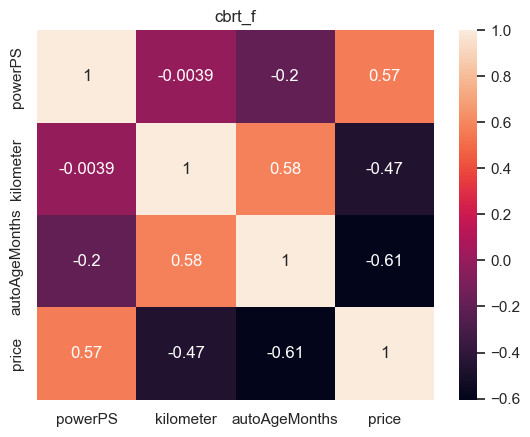

In [29]:
sns.heatmap(data_cbrt_f.corr(), annot=True)
plt.title('cbrt_f')

## log только target

In [57]:
data_log_t = data[numeric]
data_log_t['price'] = np.log1p(data[target])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5840\40202302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_log_t['price'] = np.log1p(data[target])


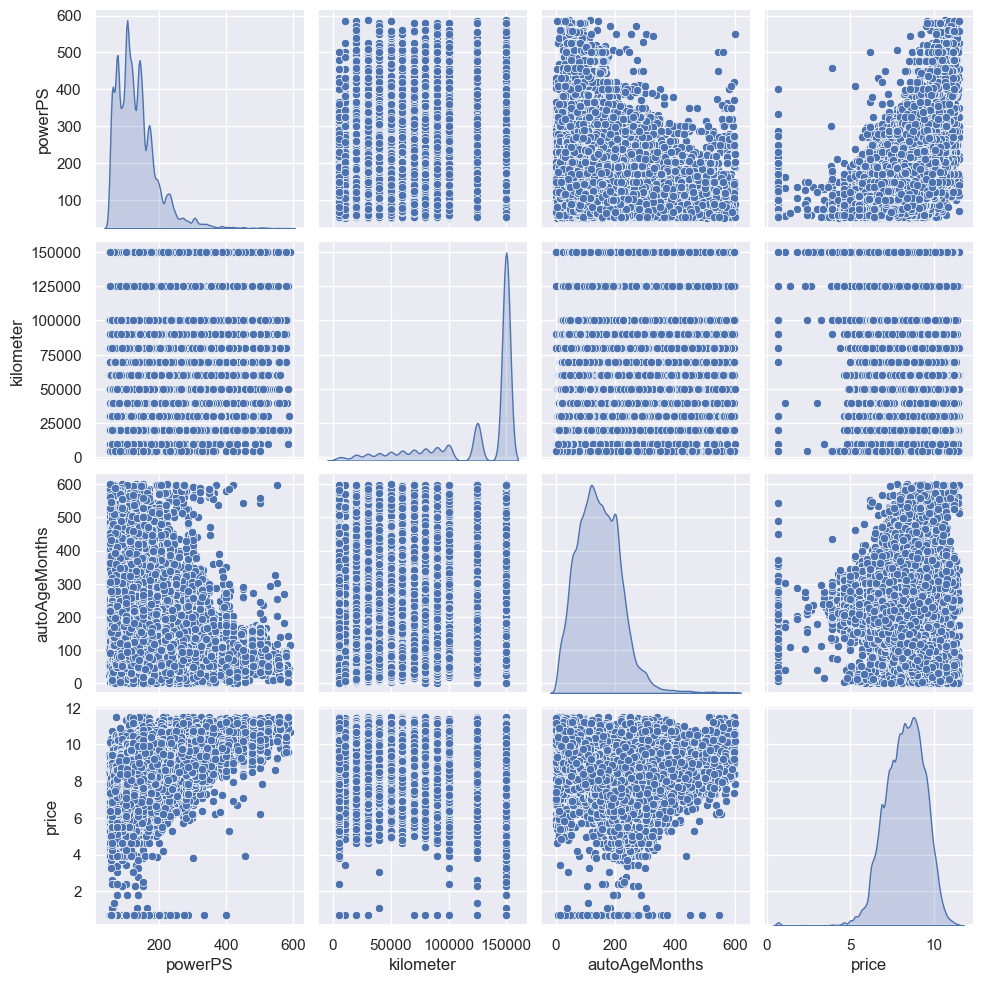

In [60]:
sns.pairplot(data_log_t, diag_kind='kde')

<Axes: >

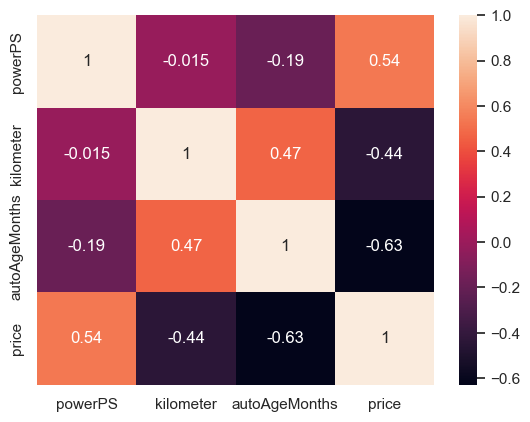

In [61]:
sns.heatmap(data_log_t.corr(), annot=True)

в итоге лучше всего себя показала трансформация sqrt над признаками и целевой переменной

Text(0.5, 1.0, 'sqrt')

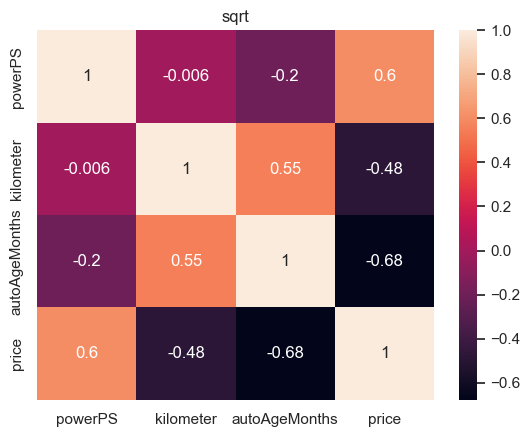

In [63]:
sns.heatmap(data_sqrt.corr(), annot=True)
plt.title('sqrt')

## Обработка категориальных признаков

In [68]:
for col in categorical:
    print(data[col].value_counts())

brand
volkswagen       49087
bmw              29194
mercedes_benz    25465
audi             23891
opel             23809
ford             15809
renault          10523
peugeot           7284
fiat              5664
skoda             4372
seat              4352
mazda             3819
toyota            3523
citroen           3375
nissan            3282
mini              2797
hyundai           2664
smart             2575
volvo             2447
mitsubishi        1939
kia               1838
honda             1838
porsche           1679
alfa_romeo        1620
suzuki            1553
chevrolet         1229
chrysler           944
dacia              690
land_rover         600
jeep               568
subaru             516
jaguar             456
daihatsu           420
saab               407
lancia             295
daewoo             295
rover              244
lada               127
Name: count, dtype: int64
model
golf               20071
andere             18280
3er                14985
a4           

In [90]:
data['model'].nunique()

249

In [91]:
count_by_brand = data.groupby('brand')['model'].nunique()
count_by_brand

brand
alfa_romeo        6
audi             16
bmw              10
chevrolet         5
chrysler          6
citroen           7
dacia             5
daewoo            5
daihatsu          7
fiat             10
ford             14
honda             5
hyundai           5
jaguar            3
jeep              4
kia               7
lada              4
lancia            7
land_rover       10
mazda             8
mercedes_benz    18
mini              4
mitsubishi        7
nissan            9
opel             16
peugeot           6
porsche           4
renault          10
rover             5
saab              3
seat             10
skoda             7
smart             4
subaru            5
suzuki            4
toyota            8
volkswagen       22
volvo             9
Name: model, dtype: int64

In [81]:
count_by_brand['model'].describe()

count       38.000000
mean      6347.105263
std      10527.472448
min        127.000000
25%        622.500000
50%       2193.000000
75%       4367.000000
max      49087.000000
Name: model, dtype: float64

In [82]:
len(data)

241190

In [92]:
data.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths  price  bias  
0       75     150000            177   1500     1  
1       69      90000             93   3600     1  
2      102     150000            246    650     1  
3      109     150000            140   2200     1  
4      105     150000            136   2000     1

In [8]:
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

In [15]:
set_config(transform_output="pandas")
data_scaled = column_transformer.fit_transform(data[numeric])
set_config(transform_output="default")

ValueError: A given column is not a column of the dataframe

In [17]:
data_scaled['price'] = data['price']
data_scaled.describe()

NameError: name 'data_scaled' is not defined

In [9]:
data[[col + '_sqrt' for col in numeric]] = np.sqrt(data[numeric])
data['price_sqrt'] = np.sqrt(data['price'])
data.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths  price  bias  powerPS_sqrt  \
0       75     150000            177   1500     1      8.660254   
1       69      90000             93   3600     1      8.306624   
2      102     150000            246    650     1     10.099505   
3      109     150000            140   2200     1     10.440307   
4      105     150000            136   2000     1     10.246951   

   kilometer_sqrt  autoAgeMonths_sqrt  price_sqrt  
0      387.298335           13.304135   38.729833  
1      300.000000            9.643651   60.000000  
2      387.298335           15.684387   25.495098  
3      387.298335           11.832160   46.904158  
4      387.298335           11.661904   44.721360

In [10]:
numeric_sqrt = [col + '_sqrt' for col in numeric]
target = ['price_sqrt']

In [11]:
X = data[numeric + numeric_sqrt + categorical + other]
y = data[target]

In [12]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric + numeric_sqrt),
    ('other',  'passthrough', other)
])
scaler = StandardScaler()

In [13]:
# YOUR CODE (data split into train/val/test):

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=43)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [18]:
X.columns, y.columns

(Index(['powerPS', 'kilometer', 'autoAgeMonths', 'powerPS_sqrt',
        'kilometer_sqrt', 'autoAgeMonths_sqrt', 'brand', 'model', 'vehicleType',
        'gearbox', 'fuelType', 'notRepairedDamage', 'bias'],
       dtype='object'),
 Index(['price_sqrt'], dtype='object'))

In [22]:
column_transformer

ColumnTransformer(transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'),
                                 ['brand', 'model', 'vehicleType', 'gearbox',
                                  'fuelType', 'notRepairedDamage']),
                                ('scaling', StandardScaler(),
                                 ['powerPS', 'kilometer', 'autoAgeMonths',
                                  'powerPS_sqrt', 'kilometer_sqrt',
                                  'autoAgeMonths_sqrt']),
                                ('other', 'passthrough', ['bias'])])

In [42]:
df = pd.DataFrame({'c': [1, 2, 3], 'a': [1, 2, 3]})
cf = ColumnTransformer([
    ('scaling', StandardScaler(), ['c'])
])
x = cf.fit_transform(df)
x

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [54]:
a1 = np.array([[1, 2, 3], [1, 2, 3]])
a2 = np.array([4, 5, 6])
np.square(a1 @ a2).mean()

1024.0

In [87]:
np.logspace(-8, -3, 10)

array([1.00000000e-08, 3.59381366e-08, 1.29154967e-07, 4.64158883e-07,
       1.66810054e-06, 5.99484250e-06, 2.15443469e-05, 7.74263683e-05,
       2.78255940e-04, 1.00000000e-03])

In [114]:
a = np.array([1, 2, 3])
np.isnan(a).any()

False

In [20]:
import warnings

warnings.filterwarnings('ignore')

In [26]:
# YOUR CODE:

from descents import get_descent
from linear_regression import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm

lambdas = np.logspace(-5, 4, 128)
methods = ['full', 'stochastic', 'momentum', 'adam']
models = {name: {'score': 0, 'model': None, 'lambda': 0} for name in methods}

X_train_tr = column_transformer.fit_transform(X_train)
y_train_tr = scaler.fit_transform(y_train)
X_val_tr = column_transformer.transform(X_val)
y_val_tr = scaler.transform(y_val)
X_test_tr = column_transformer.transform(X_test)
y_test_tr = scaler.transform(y_test)

for method in tqdm(methods):
    print(method)
    for lambda_ in lambdas:
        model = LinearRegression({'descent_name': method,
                                'kwargs': {
                                    'dimension': X_train_tr.shape[1],
                                    'lambda_': lambda_
                                }})
        model.fit(X_train_tr, y_train_tr)
        y_pred_val = model.predict(X_val_tr)
        if not (np.isnan(y_pred_val) | np.isinf(y_pred_val)).any():
            score = r2_score(y_val_tr, y_pred_val)
            print(lambda_, score, model.i)
            if score > models[method]['score']:
                models[method]['score'] = score
                models[method]['model'] = model
                models[method]['lambda'] = lambda_

  0%|                                                    | 0/4 [00:00<?, ?it/s]

full
1e-05 -16.119663113703844 1
1.177243067676929e-05 -18.625430970732253 1
1.3859012403933868e-05 -13.43257534363689 1
1.631542627737972e-05 -17.825613403983386 1
1.9207222481239318e-05 -20.69049490794593 1
2.2611569515367453e-05 -28.73321611537071 1
2.6619313461261315e-05 -24.534123232203378 1
3.1337402238589044e-05 -20.207283133388806 1
3.6891739544382435e-05 -15.810537303963233 1
4.343054463316705e-05 -21.51353972215399 1
5.112830759482937e-05 -19.42310034788693 1
6.019044567806669e-05 -6.553607341445652 1
7.085878491488879e-05 -15.094295389175343 1
8.341801332506339e-05 -22.396883609043577 1
9.820327790631257e-05 -16.199041560946764 1
0.00011560912813835741 -20.110194571903154 1
0.00013610004466105507 -15.673271907484416 1
0.0001602228340877477 -9.361247264136352 1
0.00018862122071335174 -14.331477224681663 1
0.00022205302450155356 -23.178549125618932 1
0.00026141038375114924 -17.005956262547045 1
0.0003077435620898062 -15.866809441609025 1
0.00036228897509242895 -15.521116215547

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


7.618855973704612 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


8.969245378672715 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


10.558981944335786 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


12.430488295695167 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


14.633706173946342 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


17.227429147699407 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:113: RuntimeWarning: overflow encountered in multiply
  grad = -2 * ((y - x @ self.w[:, np.newaxis]).T @ x).squeeze()
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:106: RuntimeWarning: invalid value encountered in add
  self.w += delta
 25%|███████████                                 | 1/4 [01:21<04:04, 81.64s/it]

stochastic
1e-05 -15.209963891730368 1
1.177243067676929e-05 -10.232839947997773 1
1.3859012403933868e-05 -13.520870900486132 1
1.631542627737972e-05 -19.466033958419615 1
1.9207222481239318e-05 -16.125278884326463 1
2.2611569515367453e-05 -15.333964261039537 1
2.6619313461261315e-05 -15.617823001675795 1
3.1337402238589044e-05 -24.884900675440395 1
3.6891739544382435e-05 -24.59654505056166 1
4.343054463316705e-05 -11.895754037044027 1
5.112830759482937e-05 -16.12283300791213 1
6.019044567806669e-05 -19.013723447556494 1
7.085878491488879e-05 -12.20829852605821 1
8.341801332506339e-05 -22.32001848578922 1
9.820327790631257e-05 -15.559274712602768 1
0.00011560912813835741 -16.93291867811954 1
0.00013610004466105507 -17.047546882503948 1
0.0001602228340877477 -19.216011925958906 1
0.00018862122071335174 -20.456895617408463 1
0.00022205302450155356 -14.856508915899166 1
0.00026141038375114924 -16.79937207758531 1
0.0003077435620898062 -13.884391348396424 1
0.00036228897509242895 -17.79419

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


7.618855973704612 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


8.969245378672715 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


10.558981944335786 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


12.430488295695167 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


14.633706173946342 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


17.227429147699407 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:113: RuntimeWarning: overflow encountered in multiply
  grad = -2 * ((y - x @ self.w[:, np.newaxis]).T @ x).squeeze()
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:106: RuntimeWarning: invalid value encountered in add
  self.w += delta
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:105: RuntimeWarning: overflow encountered in multiply
  delta = -self.lr() * gradient
 50%|██████████████████████                      | 2/4 [02:03<01:56, 58.47s/it]

momentum
1e-05 -19.86272871937687 1
1.177243067676929e-05 -16.690166221760848 1
1.3859012403933868e-05 -10.293644192218641 1
1.631542627737972e-05 -21.65169269364995 1
1.9207222481239318e-05 -18.30357670653921 1
2.2611569515367453e-05 -27.05851518999932 1
2.6619313461261315e-05 -21.857855211376766 1
3.1337402238589044e-05 -20.153800430378933 1
3.6891739544382435e-05 -12.15131428132198 1
4.343054463316705e-05 -22.45379175468335 1
5.112830759482937e-05 -8.921859315559349 1
6.019044567806669e-05 -20.47937102845508 1
7.085878491488879e-05 -16.27288568702721 1
8.341801332506339e-05 -18.344957698288795 1
9.820327790631257e-05 -19.17501767293294 1
0.00011560912813835741 -17.604767145848253 1
0.00013610004466105507 -18.850724930912797 1
0.0001602228340877477 -13.26018878012035 1
0.00018862122071335174 -16.511843427028044 1
0.00022205302450155356 -18.4819893131135 1
0.00026141038375114924 -18.946906915360504 1
0.0003077435620898062 -13.471414429306586 1
0.00036228897509242895 -7.905110313967151

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


10.558981944335786 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


12.430488295695167 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


14.633706173946342 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


17.227429147699407 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:113: RuntimeWarning: overflow encountered in multiply
  grad = -2 * ((y - x @ self.w[:, np.newaxis]).T @ x).squeeze()
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:163: RuntimeWarning: invalid value encountered in add
  self.h =  self.alpha * self.h + self.lr() * gradient
 75%|█████████████████████████████████           | 3/4 [03:40<01:15, 75.84s/it]

adam
1e-05 -18.072607457918895 1
1.177243067676929e-05 -19.77746404517538 1
1.3859012403933868e-05 -23.517257824104462 1
1.631542627737972e-05 -11.035539178217462 1
1.9207222481239318e-05 -19.516665233955642 1
2.2611569515367453e-05 -19.87297953734866 1
2.6619313461261315e-05 -23.953900370109363 1
3.1337402238589044e-05 -20.6835475275018 1
3.6891739544382435e-05 -19.452198671209647 1
4.343054463316705e-05 -22.120992965559402 1
5.112830759482937e-05 -16.204156963505387 1
6.019044567806669e-05 -22.13166386999879 1
7.085878491488879e-05 -18.82243056444724 1
8.341801332506339e-05 -22.483362670183958 1
9.820327790631257e-05 -19.149107732649284 1
0.00011560912813835741 -21.665141299675888 1
0.00013610004466105507 -23.689661182042553 1
0.0001602228340877477 -15.07077287654802 1
0.00018862122071335174 -19.29899999597423 1
0.00022205302450155356 -23.845644337162014 1
0.00026141038375114924 -13.947876152910762 1
0.0003077435620898062 -30.10170216936112 1
0.00036228897509242895 -23.16386537073359

100%|████████████████████████████████████████████| 4/4 [06:19<00:00, 94.96s/it]

10000.0 -172.26033718658798 300


In [27]:
print(models)

{'full': {'score': 0.8012495519191054, 'model': <linear_regression.LinearRegression object at 0x0000029BEDEDCA90>, 'lambda': 1.7542621300415897}, 'stochastic': {'score': 0.7617226872542239, 'model': <linear_regression.LinearRegression object at 0x0000029B8063F290>, 'lambda': 0.5597981979123279}, 'momentum': {'score': 0.8601723379316046, 'model': <linear_regression.LinearRegression object at 0x0000029B8069F550>, 'lambda': 1.4901443705277455}, 'adam': {'score': 0.8646724541437666, 'model': <linear_regression.LinearRegression object at 0x0000029BEAD2EBD0>, 'lambda': 0.7758250168566794}}


In [28]:
models['full']['model'].loss_history[2]

36034.96062466293

Качество на тестовой выборке:

In [29]:
for method in methods:
    print(method)
    model = models[method]['model']
    y_pred_test = model.predict(X_test_tr)
    print(r2_score(y_test_tr, y_pred_test))

full
0.7996471687224296
stochastic
0.7584121661208711
momentum
0.8577047640240681
adam
0.8621387695561834


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

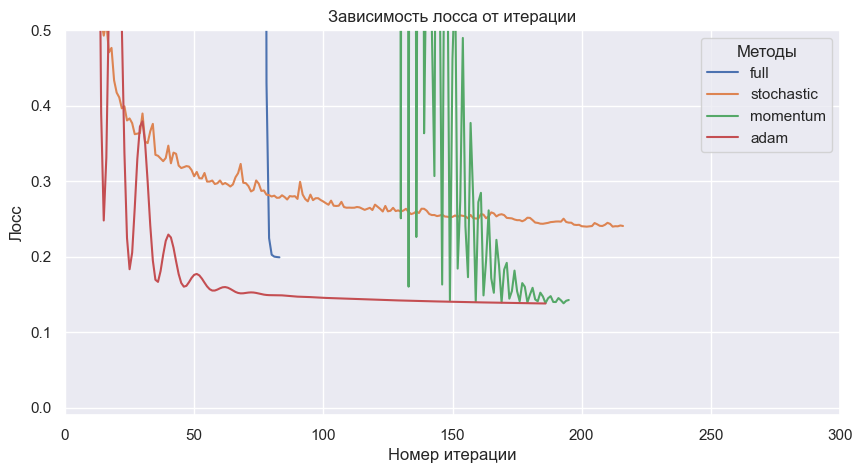

In [30]:
# YOUR CODE:

plt.figure(figsize=(10, 5))
plt.title('Зависимость лосса от итерации')
plt.xlabel('Номер итерации')
plt.ylabel('Лосс')
plt.xlim(0, 300)
plt.ylim(-0.01, 0.5)

for method in methods:
    model = models[method]['model']
    plt.plot(model.loss_history, label=method)

plt.legend(title='Методы')

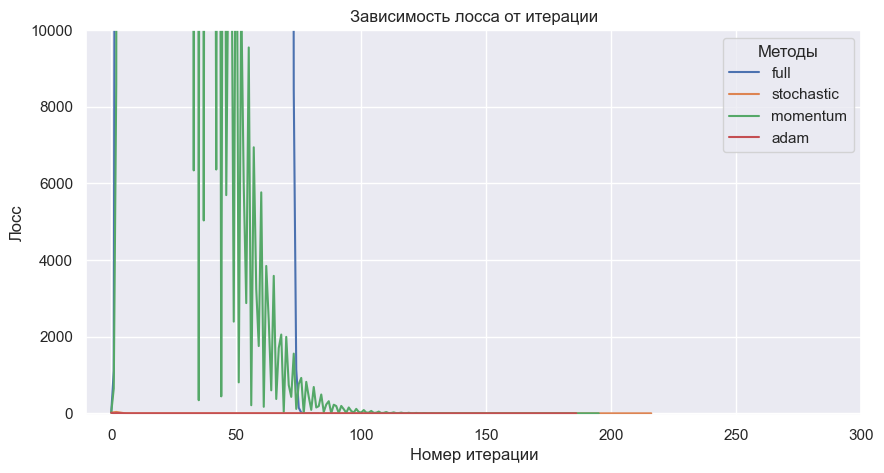

In [31]:
plt.figure(figsize=(10, 5))
plt.title('Зависимость лосса от итерации')
plt.xlabel('Номер итерации')
plt.ylabel('Лосс')
plt.xlim(-10, 300)
plt.ylim(-50, 10000)

for method in methods:
    model = models[method]['model']
    plt.plot(model.loss_history, label=method)

plt.legend(title='Методы')

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [28]:
warnings.filterwarnings('default')

In [89]:
import time

batch_sizes = np.arange(5, 3000, 10)

k = 20
res = {size: {'time_avg': 0, 'time_last': 0, 'iter': 0, 'score': 0, 'model': None} for size in batch_sizes}
for size in tqdm(batch_sizes):
    start_avg = time.process_time()
    for i in range(k):
        start = time.process_time()
        stochast_model = LinearRegression({'descent_name': 'stochastic',
                                'kwargs': {
                                    'dimension': X_train_tr.shape[1],
                                    'lambda_': models['stochastic']['model'].descent.lr.lambda_,
                                    'batch_size': size
                                }}) 
        stochast_model.fit(X_train_tr, y_train_tr)
        y_pred_test = stochast_model.predict(X_test_tr)
        score = r2_score(y_test_tr, y_pred_test)
        res[size]['iter'] += stochast_model.i
        res[size]['score'] += score
        stop = time.process_time()
    stop_avg = time.process_time()
    res[size]['model'] = stochast_model
    res[size]['iter'] /= k
    res[size]['score'] /= k
    res[size]['time_avg'] = (stop_avg - start_avg) / k
    res[size]['time_last'] = stop - start

100%|████████████████████████████████████████| 300/300 [52:48<00:00, 10.56s/it]


In [80]:
%%timeit

from descents import get_descent
from linear_regression import LinearRegression

stochast_model = LinearRegression({'descent_name': 'stochastic',
                                'kwargs': {
                                    'dimension': X_train_tr.shape[1],
                                    'lambda_': models['stochastic']['model'].descent.lr.lambda_,
                                    'batch_size': 5
                                }}) 
stochast_model.fit(X_train_tr, y_train_tr)

1.23 s ± 87.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [81]:
%%timeit

from descents import get_descent
from linear_regression import LinearRegression

stochast_model = LinearRegression({'descent_name': 'stochastic',
                                'kwargs': {
                                    'dimension': X_train_tr.shape[1],
                                    'lambda_': models['stochastic']['model'].descent.lr.lambda_,
                                    'batch_size': 10000
                                }}) 
stochast_model.fit(X_train_tr, y_train_tr)

559 ms ± 66.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


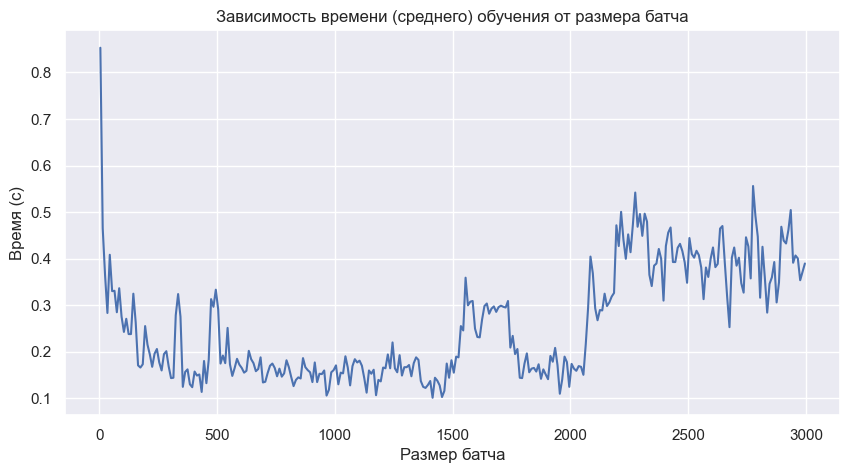

In [90]:
plt.figure(figsize=(10, 5))

sns.lineplot(x=batch_sizes, y=[res[size]['time_avg'] for size in batch_sizes])
plt.title('Зависимость времени (среднего) обучения от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Время (с)')

plt.show()

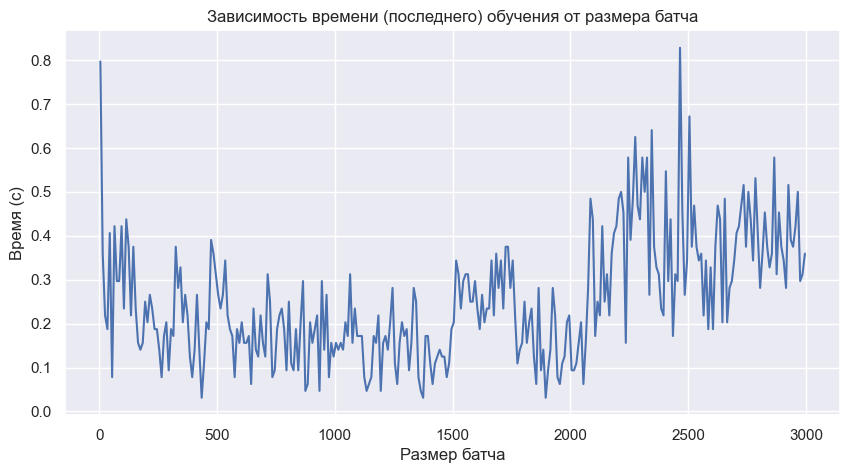

In [91]:
plt.figure(figsize=(10, 5))

sns.lineplot(x=batch_sizes, y=[res[size]['time_last'] for size in batch_sizes])
plt.title('Зависимость времени (последнего) обучения от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Время (с)')

plt.show()

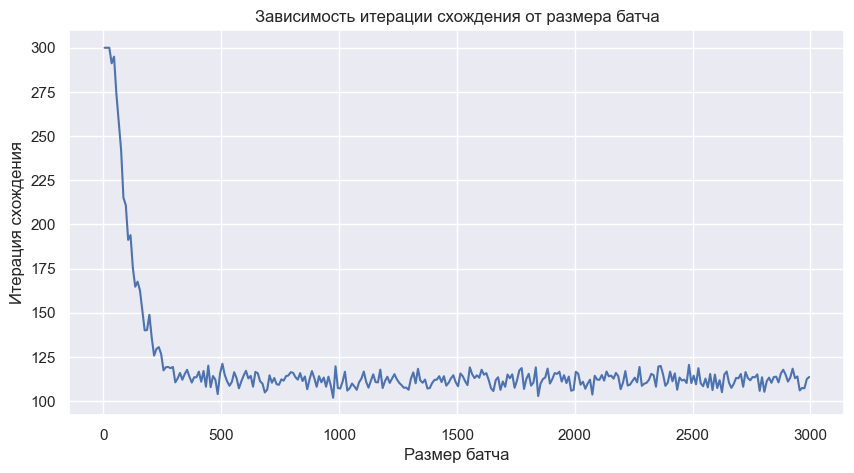

In [92]:
plt.figure(figsize=(10, 5))

sns.lineplot(x=batch_sizes, y=[res[size]['iter'] for size in batch_sizes])
plt.title('Зависимость итерации схождения от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Итерация схождения')
# plt.ylim(90, 125)

plt.show()

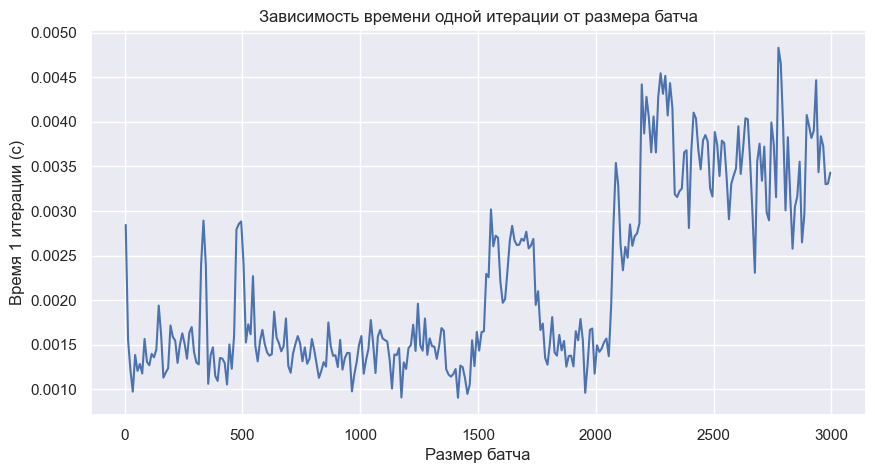

In [93]:
time_per_iter = [res[size]['time_avg'] / res[size]['iter'] for size in batch_sizes]

plt.figure(figsize=(10, 5))

sns.lineplot(x=batch_sizes, y=time_per_iter)
plt.title('Зависимость времени одной итерации от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Время 1 итерации (с)')
# plt.xlim(0, 100)
# plt.ylim(0, 1)

plt.show()

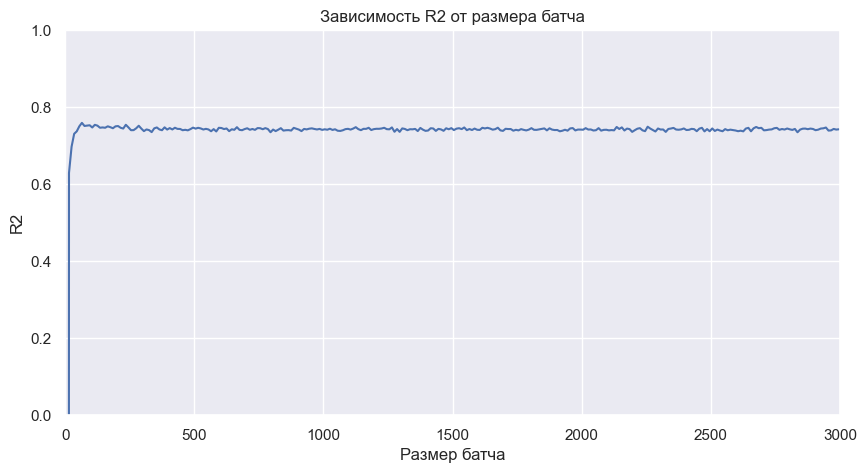

In [96]:
plt.figure(figsize=(10, 5))

sns.lineplot(x=batch_sizes, y=[res[size]['score'] for size in batch_sizes])
plt.title('Зависимость R2 от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('R2')
plt.xlim(0, 3000)
plt.ylim(0, 1)

plt.show()

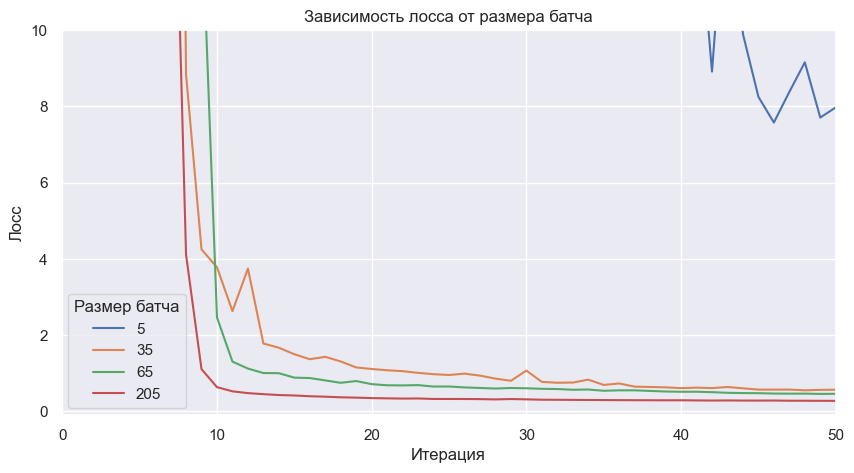

In [99]:
plt.figure(figsize=(10, 5))

# for size in batch_sizes[::50]:
plt.plot(res[5]['model'].loss_history, label=5)
plt.plot(res[35]['model'].loss_history, label=35)
plt.plot(res[65]['model'].loss_history, label=65)
plt.plot(res[205]['model'].loss_history, label=205)
    
plt.title('Зависимость лосса от размера батча')
plt.xlabel('Итерация')
plt.ylabel('Лосс')
plt.ylim(-0.1, 10)
plt.xlim(-0.1, 50)
plt.legend(title='Размер батча')

plt.show()

`### ваше решение тут ###`

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [25]:
warnings.filterwarnings('ignore')

In [39]:
from descents import get_descent
from linear_regression import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline, make_pipeline
from tqdm import tqdm

lambdas = np.logspace(-1, 4, 64)
mus = np.logspace(-6, -1, 6)
methods = ['full', 'stochastic', 'momentum', 'adam']
models_l2 = {name: {'score': 0, 'model': None, 'lambda': 0, 'mu': 0} for name in methods}

pipeline = make_pipeline()

X_train_tr = column_transformer.fit_transform(X_train)
y_train_tr = scaler.fit_transform(y_train)
X_val_tr = column_transformer.transform(X_val)
y_val_tr = scaler.transform(y_val)
X_test_tr = column_transformer.transform(X_test)
y_test_tr = scaler.transform(y_test)

for method in tqdm(methods):
    print(method)
    for lambda_ in tqdm(lambdas):
        for mu in mus:
            model = LinearRegression({'descent_name': method,
                                      'regularized': True,
                                    'kwargs': {
                                        'dimension': X_train_tr.shape[1],
                                        'lambda_': lambda_,
                                        'mu': mu
                                    }})
            model.fit(X_train_tr, y_train_tr)
            y_pred_val = model.predict(X_val_tr)
            if not (np.isnan(y_pred_val) | np.isinf(y_pred_val)).any():
                score = r2_score(y_val_tr, y_pred_val)
                print(lambda_, mu, score, model.i)
                if score > models_l2[method]['score']:
                    models_l2[method]['score'] = score
                    models_l2[method]['model'] = model
                    models_l2[method]['lambda'] = lambda_
                    models_l2[method]['mu'] = mu
            else:
                break
        else:
            continue
        break
    

  0%|                                                    | 0/4 [00:00<?, ?it/s]

full



  0%|                                                   | 0/64 [00:00<?, ?it/s]

0.1 1e-06 0.43879699280194384 19
0.1 1e-05 0.5600781222195699 20
0.1 0.0001 0.43431402806432295 23
0.1 0.001 0.47556454775328927 21
0.1 0.01 0.511538323484634 18



  2%|▋                                          | 1/64 [00:01<01:29,  1.42s/it]

0.1 0.1 0.6387293954267839 83
0.12005080577484073 1e-06 0.46638728815567965 23
0.12005080577484073 1e-05 0.43991858221979085 24
0.12005080577484073 0.0001 0.44206879552965384 22
0.12005080577484073 0.001 0.4639376643091019 24
0.12005080577484073 0.01 0.36834283634707676 38



  3%|█▎                                         | 2/64 [00:03<01:40,  1.62s/it]

0.12005080577484073 0.1 0.5714264095268069 109
0.14412195967188537 1e-06 0.5110786796420714 27
0.14412195967188537 1e-05 0.5276120918300411 25
0.14412195967188537 0.0001 0.46807369397157583 24
0.14412195967188537 0.001 0.4839400361958427 25
0.14412195967188537 0.01 0.500571208261384 31



  5%|██                                         | 3/64 [00:05<01:50,  1.81s/it]

0.14412195967188537 0.1 0.6754449294687971 126
0.17301957388458944 1e-06 0.5720279334704164 32
0.17301957388458944 1e-05 0.5520307237811911 26
0.17301957388458944 0.0001 0.46450214315432703 37
0.17301957388458944 0.001 0.5316459973032672 28
0.17301957388458944 0.01 0.5481408707430585 40



  6%|██▋                                        | 4/64 [00:07<01:59,  1.99s/it]

0.17301957388458944 0.1 0.7348172391273949 138
0.20771139259664553 1e-06 0.5514690279900506 35
0.20771139259664553 1e-05 0.5659976897267897 35
0.20771139259664553 0.0001 0.5956412514613101 31
0.20771139259664553 0.001 0.5852398298453376 31
0.20771139259664553 0.01 0.5793275183569768 33



  8%|███▎                                       | 5/64 [00:09<02:07,  2.16s/it]

0.20771139259664553 0.1 0.7162321212688176 171
0.24935920049841584 1e-06 0.5804316040631092 38
0.24935920049841584 1e-05 0.5699775635580591 42
0.24935920049841584 0.0001 0.5699881168204113 47
0.24935920049841584 0.001 0.6209162738709387 37
0.24935920049841584 0.01 0.6201801531293485 41



  9%|████                                       | 6/64 [00:12<02:18,  2.39s/it]

0.24935920049841584 0.1 0.7415274806088687 185
0.299357729472049 1e-06 0.6568529173273963 38
0.299357729472049 1e-05 0.6582001475840153 30
0.299357729472049 0.0001 0.6341408210830095 39
0.299357729472049 0.001 0.6180536409053834 33
0.299357729472049 0.01 0.6520312627976781 40



 11%|████▋                                      | 7/64 [00:15<02:22,  2.51s/it]

0.299357729472049 0.1 0.7595536192355058 191
0.35938136638046275 1e-06 0.6638531235154312 41
0.35938136638046275 1e-05 0.6632951459940668 37
0.35938136638046275 0.0001 0.657850181527402 39
0.35938136638046275 0.001 0.6524415239021022 40
0.35938136638046275 0.01 0.6868633410849574 47



 12%|█████▍                                     | 8/64 [00:18<02:30,  2.69s/it]

0.35938136638046275 0.1 0.7736932459715673 198
0.4314402261443781 1e-06 0.6980165897664068 45
0.4314402261443781 1e-05 0.6957372320227333 43
0.4314402261443781 0.0001 0.6965769282833991 38
0.4314402261443781 0.001 0.6803792799928029 44
0.4314402261443781 0.01 0.719564446229045 51



 14%|██████                                     | 9/64 [00:21<02:33,  2.80s/it]

0.4314402261443781 0.1 0.7826808340145013 195
0.517947467923121 1e-06 0.7096322784986218 49
0.517947467923121 1e-05 0.7143918611727254 38
0.517947467923121 0.0001 0.7109991944325873 36
0.517947467923121 0.001 0.6805292435859863 41
0.517947467923121 0.01 0.7120616833117457 55



 16%|██████▌                                   | 10/64 [00:24<02:34,  2.86s/it]

0.517947467923121 0.1 0.7895325477591209 193
0.6218001087320917 1e-06 0.7110242236764733 46
0.6218001087320917 1e-05 0.7137498470718052 48
0.6218001087320917 0.0001 0.6930180515628843 49
0.6218001087320917 0.001 0.7082592393462454 46
0.6218001087320917 0.01 0.7487211027016862 58



 17%|███████▏                                  | 11/64 [00:27<02:33,  2.90s/it]

0.6218001087320917 0.1 0.7882988414488142 177
0.746476040841712 1e-06 0.730322412494937 49
0.746476040841712 1e-05 0.7344816166089858 39
0.746476040841712 0.0001 0.7269558030138419 42
0.746476040841712 0.001 0.7356416411874326 49
0.746476040841712 0.01 0.7569702793476849 73



 19%|███████▉                                  | 12/64 [00:30<02:31,  2.92s/it]

0.746476040841712 0.1 0.7929137418913923 162
0.8961505019466045 1e-06 0.7362788848508628 50
0.8961505019466045 1e-05 0.7412392544796065 49
0.8961505019466045 0.0001 0.7434069212123962 48
0.8961505019466045 0.001 0.754885124229069 50
0.8961505019466045 0.01 0.7618955727503298 95



 20%|████████▌                                 | 13/64 [00:33<02:29,  2.94s/it]

0.8961505019466045 0.1 0.7909285695585999 143
1.0758358985421785 1e-06 0.7537795811086658 61
1.0758358985421785 1e-05 0.7551302771251046 56
1.0758358985421785 0.0001 0.7583001852900152 51
1.0758358985421785 0.001 0.7707729751636327 46
1.0758358985421785 0.01 0.7900440467571508 106



 22%|█████████▏                                | 14/64 [00:36<02:29,  3.00s/it]

1.0758358985421785 0.1 0.7949115362603337 130
1.291549665014884 1e-06 0.7754233118388861 57
1.291549665014884 1e-05 0.770298522983055 68
1.291549665014884 0.0001 0.7814281169908296 50
1.291549665014884 0.001 0.7664657644651911 63
1.291549665014884 0.01 0.8103244495082483 124



 23%|█████████▊                                | 15/64 [00:40<02:33,  3.14s/it]

1.291549665014884 0.1 0.7955913440821671 112
1.5505157798326246 1e-06 0.7924428998083884 66
1.5505157798326246 1e-05 0.7884276756448582 66
1.5505157798326246 0.0001 0.7858535365628138 66
1.5505157798326246 0.001 0.7976946168608213 66
1.5505157798326246 0.01 0.8178429958424321 151



 25%|██████████▌                               | 16/64 [00:43<02:39,  3.33s/it]

1.5505157798326246 0.1 0.7949044043257963 97
1.8614066873551212 1e-06 0.8024551608594199 93
1.8614066873551212 1e-05 0.809457376910874 93
1.8614066873551212 0.0001 0.8029050002246674 93
1.8614066873551212 0.001 0.8032512473692244 93
1.8614066873551212 0.01 0.829664423677861 167



 27%|███████████▏                              | 17/64 [00:48<02:56,  3.76s/it]

1.8614066873551212 0.1 0.7949610508834323 96
2.2346337269165937 1e-06 -207949.60713239305 300
2.2346337269165937 1e-05 -87931.66111506443 300
2.2346337269165937 0.0001 -28884.04628218244 300
2.2346337269165937 0.001 -93186.40525186328 300
2.2346337269165937 0.01 -17620.0448651791 300



 28%|███████████▊                              | 18/64 [01:01<04:58,  6.49s/it]

2.2346337269165937 0.1 -60.071082867838584 300
2.6826957952797246 1e-06 -1.6468589434511583e+21 300
2.6826957952797246 1e-05 -1.5738394446822656e+21 300
2.6826957952797246 0.0001 -2.6552347687749534e+21 300
2.6826957952797246 0.001 -1.4981966132049842e+21 300
2.6826957952797246 0.01 -2.3333582146613962e+20 300



 30%|████████████▍                             | 19/64 [01:13<06:09,  8.22s/it]

2.6826957952797246 0.1 -8.489992009266121e+18 300
3.220597918721083 1e-06 -5.961397043557288e+45 300
3.220597918721083 1e-05 -4.273398456836495e+45 300
3.220597918721083 0.0001 -4.077789340063289e+45 300
3.220597918721083 0.001 -1.991310511311721e+45 300
3.220597918721083 0.01 -2.717474019472802e+45 300



 31%|█████████████▏                            | 20/64 [01:26<06:55,  9.45s/it]

3.220597918721083 0.1 -1.830543674920272e+44 300
3.8663537521924103 1e-06 -7.48658296684714e+80 300
3.8663537521924103 1e-05 -3.089091619218405e+80 300
3.8663537521924103 0.0001 -1.9317114773332661e+80 300
3.8663537521924103 0.001 -1.9288027694635868e+80 300
3.8663537521924103 0.01 -2.1480290248299045e+80 300



 33%|█████████████▊                            | 21/64 [01:38<07:22, 10.29s/it]

3.8663537521924103 0.1 -4.655484585488688e+81 300
4.6415888336127775 1e-06 -3.740277705777029e+155 300
4.6415888336127775 1e-05 -3.847722241253663e+155 300
4.6415888336127775 0.0001 -4.921051167902072e+155 300
4.6415888336127775 0.001 -3.7432306902534267e+155 300
4.6415888336127775 0.01 -2.0267028277097255e+156 300



 34%|██████████████▍                           | 22/64 [01:50<07:38, 10.92s/it]

4.6415888336127775 0.1 -4.660828334419386e+161 300
5.572264795507174 1e-06 -7.810213564333907e+229 300
5.572264795507174 1e-05 -1.5686032314040684e+230 300
5.572264795507174 0.0001 -6.82393205080392e+229 300
5.572264795507174 0.001 -6.835101163300161e+229 300
5.572264795507174 0.01 -4.085345262624746e+230 300



 36%|███████████████                           | 23/64 [02:03<07:48, 11.43s/it]

5.572264795507174 0.1 -4.0381443512452183e+235 300
6.689548786914143 1e-06 -5.290772615574936e+297 300
6.689548786914143 1e-05 -2.3968378357501717e+297 300
6.689548786914143 0.0001 -3.141126701721376e+297 300
6.689548786914143 0.001 -3.8370740332958353e+297 300
6.689548786914143 0.01 -1.9382681029824018e+298 300



 38%|███████████████▊                          | 24/64 [02:16<07:51, 11.79s/it]

6.689548786914143 0.1 -3.51878276417062e+302 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


8.030857221391512 1e-06 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


8.030857221391512 1e-05 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


8.030857221391512 0.0001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


8.030857221391512 0.001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


8.030857221391512 0.01 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)

 39%|████████████████▍                         | 25/64 [02:28<07:48, 12.02s/it]

8.030857221391512 0.1 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


9.641108804907496 1e-06 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


9.641108804907496 1e-05 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


9.641108804907496 0.0001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


9.641108804907496 0.001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


9.641108804907496 0.01 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)

 41%|█████████████████                         | 26/64 [02:41<07:43, 12.19s/it]

9.641108804907496 0.1 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


11.574228805920567 1e-06 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


11.574228805920567 1e-05 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


11.574228805920567 0.0001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


11.574228805920567 0.001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


11.574228805920567 0.01 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)

 42%|█████████████████▋                        | 27/64 [02:53<07:34, 12.28s/it]

11.574228805920567 0.1 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


13.894954943731374 1e-06 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


13.894954943731374 1e-05 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


13.894954943731374 0.0001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


13.894954943731374 0.001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


13.894954943731374 0.01 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)

 44%|██████████████████▍                       | 28/64 [03:05<07:22, 12.28s/it]

13.894954943731374 0.1 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


16.68100537200059 1e-06 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


16.68100537200059 1e-05 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


16.68100537200059 0.0001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


16.68100537200059 0.001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


16.68100537200059 0.01 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)

 45%|███████████████████                       | 29/64 [03:18<07:10, 12.30s/it]

16.68100537200059 0.1 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:113: RuntimeWarning: overflow encountered in multiply
  grad = -2 * ((y - x @ self.w[:, np.newaxis]).T @ x).squeeze()
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:106: RuntimeWarning: invalid value encountered in add
  self.w += delta
 25%|██████████▊                                | 1/4 [03:20<10:00, 200.24s/it]

stochastic



  0%|                                                   | 0/64 [00:00<?, ?it/s]

0.1 1e-06 0.5096619070423343 42
0.1 1e-05 0.5324277463674961 23
0.1 0.0001 0.5013494792266635 26
0.1 0.001 0.4402408169125769 43
0.1 0.01 0.5209257870086221 44



  2%|▋                                          | 1/64 [00:00<00:52,  1.19it/s]

0.1 0.1 0.6114028859936174 99
0.12005080577484073 1e-06 0.5271518520471268 32
0.12005080577484073 1e-05 0.48028955636373505 40
0.12005080577484073 0.0001 0.5347665852181489 30
0.12005080577484073 0.001 0.490216540669133 37
0.12005080577484073 0.01 0.4924364604199891 49



  3%|█▎                                         | 2/64 [00:01<00:56,  1.11it/s]

0.12005080577484073 0.1 0.6671177420038378 114
0.14412195967188537 1e-06 0.5298059070680334 43
0.14412195967188537 1e-05 0.5197204066539891 46
0.14412195967188537 0.0001 0.4943750681825634 47
0.14412195967188537 0.001 0.5979050542672796 34
0.14412195967188537 0.01 0.5591640577333006 49



  5%|██                                         | 3/64 [00:02<01:01,  1.00s/it]

0.14412195967188537 0.1 0.6776302050985694 146
0.17301957388458944 1e-06 0.6514918378649155 64
0.17301957388458944 1e-05 0.5967099082385248 57
0.17301957388458944 0.0001 0.6234539339688194 76
0.17301957388458944 0.001 0.5109367224607948 49
0.17301957388458944 0.01 0.6185921498262436 57



  6%|██▋                                        | 4/64 [00:04<01:09,  1.16s/it]

0.17301957388458944 0.1 0.7345729152857368 162
0.20771139259664553 1e-06 0.6673943883358636 96
0.20771139259664553 1e-05 0.6005350506827725 36
0.20771139259664553 0.0001 0.6203638591991232 115
0.20771139259664553 0.001 0.6698821557059367 83
0.20771139259664553 0.01 0.6576233644034836 87



  8%|███▎                                       | 5/64 [00:06<01:23,  1.41s/it]

0.20771139259664553 0.1 0.7214658677916843 194
0.24935920049841584 1e-06 0.6481653840570599 110
0.24935920049841584 1e-05 0.6726205434769565 90
0.24935920049841584 0.0001 0.6782725463752428 101
0.24935920049841584 0.001 0.685860863095241 123
0.24935920049841584 0.01 0.6628200575444982 100



  9%|████                                       | 6/64 [00:08<01:37,  1.69s/it]

0.24935920049841584 0.1 0.75845427777496 230
0.299357729472049 1e-06 0.6776985090032575 111
0.299357729472049 1e-05 0.6734499492045871 102
0.299357729472049 0.0001 0.7054305828079734 100
0.299357729472049 0.001 0.7085838647699213 91
0.299357729472049 0.01 0.6827745206062562 66



 11%|████▋                                      | 7/64 [00:10<01:45,  1.84s/it]

0.299357729472049 0.1 0.7777003147419828 252
0.35938136638046275 1e-06 0.7297604750267774 148
0.35938136638046275 1e-05 0.717387511269485 142
0.35938136638046275 0.0001 0.6774210384098014 96
0.35938136638046275 0.001 0.7188391498352749 120
0.35938136638046275 0.01 0.7123904889576176 109



 12%|█████▍                                     | 8/64 [00:13<01:56,  2.08s/it]

0.35938136638046275 0.1 0.7846141161365335 251
0.4314402261443781 1e-06 0.73238375668671 134
0.4314402261443781 1e-05 0.7461076399281669 138
0.4314402261443781 0.0001 0.7313631497633685 149
0.4314402261443781 0.001 0.7321025939621741 188
0.4314402261443781 0.01 0.7593055315514299 157



 14%|██████                                     | 9/64 [00:16<02:12,  2.41s/it]

0.4314402261443781 0.1 0.7858035401717216 291
0.517947467923121 1e-06 0.7511622883740064 164
0.517947467923121 1e-05 0.7426830814770091 192
0.517947467923121 0.0001 0.7416063027674611 222
0.517947467923121 0.001 0.7711764091107259 220
0.517947467923121 0.01 0.7697865250450522 224



 16%|██████▌                                   | 10/64 [00:20<02:33,  2.84s/it]

0.517947467923121 0.1 0.782037409548956 263
0.6218001087320917 1e-06 0.7744331055323737 300
0.6218001087320917 1e-05 0.7821552275807292 252
0.6218001087320917 0.0001 0.764118964808229 250
0.6218001087320917 0.001 0.765296827849938 249
0.6218001087320917 0.01 0.7640284873387093 211



 17%|███████▏                                  | 11/64 [00:24<02:59,  3.39s/it]

0.6218001087320917 0.1 0.7917816292991 294
0.746476040841712 1e-06 0.5846857656159511 300
0.746476040841712 1e-05 0.5242909905375703 300
0.746476040841712 0.0001 0.6654415828731648 300
0.746476040841712 0.001 0.7194334274086669 300
0.746476040841712 0.01 0.7077710506303528 300



 19%|███████▉                                  | 12/64 [00:29<03:26,  3.96s/it]

0.746476040841712 0.1 0.7882499522501765 300
0.8961505019466045 1e-06 -13.233745307654612 300
0.8961505019466045 1e-05 -3.900515529592937 300
0.8961505019466045 0.0001 -3.320970260247125 300
0.8961505019466045 0.001 -2.9786319002403148 300
0.8961505019466045 0.01 -1.249088399682888 300



 20%|████████▌                                 | 13/64 [00:35<03:43,  4.37s/it]

0.8961505019466045 0.1 0.6982751787852994 300
1.0758358985421785 1e-06 -10057.039472428065 300
1.0758358985421785 1e-05 -7422.272907956375 300
1.0758358985421785 0.0001 -688.0511866311982 300
1.0758358985421785 0.001 -694.470159781696 300
1.0758358985421785 0.01 -508.6978164988197 300



 22%|█████████▏                                | 14/64 [00:40<03:52,  4.65s/it]

1.0758358985421785 0.1 -3.0291949831757057 300
1.291549665014884 1e-06 -3196280.7997739934 300
1.291549665014884 1e-05 -6684758.246401598 300
1.291549665014884 0.0001 -917372.7882315135 300
1.291549665014884 0.001 -7727651.341036993 300
1.291549665014884 0.01 -945041.5627345624 300



 23%|█████████▊                                | 15/64 [00:45<03:57,  4.84s/it]

1.291549665014884 0.1 -10138.274038247073 300
1.5505157798326246 1e-06 -3845147774965.4043 300
1.5505157798326246 1e-05 -936744792901.5627 300
1.5505157798326246 0.0001 -677211495982.4314 300
1.5505157798326246 0.001 -492184499985.57874 300
1.5505157798326246 0.01 -79565501795.02187 300



 25%|██████████▌                               | 16/64 [00:51<03:58,  4.97s/it]

1.5505157798326246 0.1 -366688508.3835807 300
1.8614066873551212 1e-06 -6.043336635640252e+18 300
1.8614066873551212 1e-05 -5.262046229357519e+20 300
1.8614066873551212 0.0001 -6.884281776503656e+19 300
1.8614066873551212 0.001 -1.6155761552919067e+23 300
1.8614066873551212 0.01 -3.661160111415194e+18 300



 27%|███████████▏                              | 17/64 [00:56<03:58,  5.07s/it]

1.8614066873551212 0.1 -8.489748821143556e+17 300
2.2346337269165937 1e-06 -1.2267979883594993e+30 300
2.2346337269165937 1e-05 -1.9264135729942964e+30 300
2.2346337269165937 0.0001 -7.739999571222676e+31 300
2.2346337269165937 0.001 -3.4768474860743926e+31 300
2.2346337269165937 0.01 -2.9985576574865845e+30 300



 28%|███████████▊                              | 18/64 [01:01<03:56,  5.13s/it]

2.2346337269165937 0.1 -5.298096498908341e+27 300
2.6826957952797246 1e-06 -4.845848455460774e+47 300
2.6826957952797246 1e-05 -1.5001504450624096e+47 300
2.6826957952797246 0.0001 -2.4520602207289403e+48 300
2.6826957952797246 0.001 -9.395747231495164e+47 300
2.6826957952797246 0.01 -2.225979990550698e+46 300



 30%|████████████▍                             | 19/64 [01:07<03:53,  5.20s/it]

2.6826957952797246 0.1 -4.059137775899089e+46 300
3.220597918721083 1e-06 -9.430652909357791e+71 300
3.220597918721083 1e-05 -4.458551902840327e+72 300
3.220597918721083 0.0001 -1.016952092148575e+71 300
3.220597918721083 0.001 -1.0512894140663536e+70 300
3.220597918721083 0.01 -2.5108413949521735e+71 300



 31%|█████████████▏                            | 20/64 [01:12<03:49,  5.22s/it]

3.220597918721083 0.1 -4.9788395236062567e+70 300
3.8663537521924103 1e-06 -3.6220094400306313e+106 300
3.8663537521924103 1e-05 -3.46849206854249e+106 300
3.8663537521924103 0.0001 -8.873667963371477e+106 300
3.8663537521924103 0.001 -4.532901403000471e+106 300
3.8663537521924103 0.01 -4.404259219004244e+105 300



 33%|█████████████▊                            | 21/64 [01:17<03:45,  5.25s/it]

3.8663537521924103 0.1 -5.920522001624097e+102 300
4.6415888336127775 1e-06 -9.084615287430126e+156 300
4.6415888336127775 1e-05 -2.171068596476658e+154 300
4.6415888336127775 0.0001 -2.078041855321009e+153 300
4.6415888336127775 0.001 -5.785528449714509e+157 300
4.6415888336127775 0.01 -7.410912882367055e+159 300



 34%|██████████████▍                           | 22/64 [01:23<03:42,  5.29s/it]

4.6415888336127775 0.1 -7.945692474602325e+161 300
5.572264795507174 1e-06 -4.049287148080368e+226 300
5.572264795507174 1e-05 -3.1078269761887126e+225 300
5.572264795507174 0.0001 -5.16911841550892e+229 300
5.572264795507174 0.001 -9.456620781863412e+225 300
5.572264795507174 0.01 -3.4516827967904284e+230 300



 36%|███████████████                           | 23/64 [01:28<03:38,  5.33s/it]

5.572264795507174 0.1 -1.958633495431756e+234 300
6.689548786914143 1e-06 -1.1610063505176373e+293 300
6.689548786914143 1e-05 -2.553932155843743e+295 300
6.689548786914143 0.0001 -5.3795811187841045e+296 300
6.689548786914143 0.001 -2.9861265024506746e+292 300
6.689548786914143 0.01 -1.4926248863889405e+295 300



 38%|███████████████▊                          | 24/64 [01:33<03:33,  5.34s/it]

6.689548786914143 0.1 -1.3846030488135265e+301 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


8.030857221391512 1e-06 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


8.030857221391512 1e-05 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


8.030857221391512 0.0001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


8.030857221391512 0.001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


8.030857221391512 0.01 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)

 39%|████████████████▍                         | 25/64 [01:39<03:28,  5.35s/it]

8.030857221391512 0.1 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


9.641108804907496 1e-06 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


9.641108804907496 1e-05 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


9.641108804907496 0.0001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


9.641108804907496 0.001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


9.641108804907496 0.01 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)

 41%|█████████████████                         | 26/64 [01:44<03:23,  5.35s/it]

9.641108804907496 0.1 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


11.574228805920567 1e-06 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


11.574228805920567 1e-05 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


11.574228805920567 0.0001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


11.574228805920567 0.001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


11.574228805920567 0.01 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)

 42%|█████████████████▋                        | 27/64 [01:49<03:18,  5.36s/it]

11.574228805920567 0.1 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


13.894954943731374 1e-06 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


13.894954943731374 1e-05 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


13.894954943731374 0.0001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


13.894954943731374 0.001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


13.894954943731374 0.01 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)

 44%|██████████████████▍                       | 28/64 [01:55<03:12,  5.35s/it]

13.894954943731374 0.1 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


16.68100537200059 1e-06 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


16.68100537200059 1e-05 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


16.68100537200059 0.0001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


16.68100537200059 0.001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


16.68100537200059 0.01 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)

 45%|███████████████████                       | 29/64 [02:00<03:07,  5.36s/it]

16.68100537200059 0.1 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:113: RuntimeWarning: overflow encountered in multiply
  grad = -2 * ((y - x @ self.w[:, np.newaxis]).T @ x).squeeze()
 50%|█████████████████████▌                     | 2/4 [05:21<05:07, 153.92s/it]

momentum



  0%|                                                   | 0/64 [00:00<?, ?it/s]

0.1 1e-06 0.7477116082417408 77
0.1 1e-05 0.752250057230481 77
0.1 0.0001 0.7717228119755166 87
0.1 0.001 0.7462667621971248 88
0.1 0.01 0.7893830158907076 112



  2%|▋                                          | 1/64 [00:03<04:01,  3.83s/it]

0.1 0.1 0.7936415595310118 121
0.12005080577484073 1e-06 0.7791773196072582 89
0.12005080577484073 1e-05 0.7572234728484927 79
0.12005080577484073 0.0001 0.7882801147699546 88
0.12005080577484073 0.001 0.7846808946228798 88
0.12005080577484073 0.01 0.806925226274772 122



  3%|█▎                                         | 2/64 [00:07<03:59,  3.86s/it]

0.12005080577484073 0.1 0.7944656556398231 98
0.14412195967188537 1e-06 0.8009526129504447 96
0.14412195967188537 1e-05 0.7952685490086145 88
0.14412195967188537 0.0001 0.7846358002374227 97
0.14412195967188537 0.001 0.793072927891542 96
0.14412195967188537 0.01 0.8213547049385848 135



  5%|██                                         | 3/64 [00:11<04:02,  3.97s/it]

0.14412195967188537 0.1 0.79254183898762 87
0.17301957388458944 1e-06 0.7973571521671482 94
0.17301957388458944 1e-05 0.8072918310194572 94
0.17301957388458944 0.0001 0.791825665235375 95
0.17301957388458944 0.001 0.8115180514185288 95
0.17301957388458944 0.01 0.8268442506390525 156



  6%|██▋                                        | 4/64 [00:16<04:05,  4.09s/it]

0.17301957388458944 0.1 0.789853403705799 85
0.20771139259664553 1e-06 0.81622989195402 92
0.20771139259664553 1e-05 0.8164458371408808 99
0.20771139259664553 0.0001 0.8085483754753082 100
0.20771139259664553 0.001 0.8125488214028309 92
0.20771139259664553 0.01 0.8340699267600202 177



  8%|███▎                                       | 5/64 [00:20<04:09,  4.23s/it]

0.20771139259664553 0.1 0.7931862071836471 91
0.24935920049841584 1e-06 0.8172502486754423 95
0.24935920049841584 1e-05 0.8230200133048059 96
0.24935920049841584 0.0001 0.8233740998014759 96
0.24935920049841584 0.001 0.8246707349118052 96
0.24935920049841584 0.01 0.8399744910012631 185



  9%|████                                       | 6/64 [00:25<04:13,  4.36s/it]

0.24935920049841584 0.1 0.7942014384446742 95
0.299357729472049 1e-06 0.831770282046141 98
0.299357729472049 1e-05 0.8282480736623987 98
0.299357729472049 0.0001 0.8301693936115492 98
0.299357729472049 0.001 0.823932825862457 98
0.299357729472049 0.01 0.845079919420697 194



 11%|████▋                                      | 7/64 [00:30<04:22,  4.61s/it]

0.299357729472049 0.1 0.7918378533699566 96
0.35938136638046275 1e-06 0.8312036380076684 98
0.35938136638046275 1e-05 0.8357674380330262 98
0.35938136638046275 0.0001 0.8359255479129377 98
0.35938136638046275 0.001 0.8375756572430099 104
0.35938136638046275 0.01 0.8469901051251321 201



 12%|█████▍                                     | 8/64 [00:35<04:20,  4.65s/it]

0.35938136638046275 0.1 0.7893766435956513 86
0.4314402261443781 1e-06 0.8415038983014618 98
0.4314402261443781 1e-05 0.8412836666892105 92
0.4314402261443781 0.0001 0.8384174114657068 98
0.4314402261443781 0.001 0.8439334050245129 98
0.4314402261443781 0.01 0.8483091198325118 183



 14%|██████                                     | 9/64 [00:39<04:13,  4.61s/it]

0.4314402261443781 0.1 0.791418329967807 91
0.517947467923121 1e-06 0.8421413721363309 101
0.517947467923121 1e-05 0.8421405275688667 91
0.517947467923121 0.0001 0.8374115282455554 91
0.517947467923121 0.001 0.8499114636175289 106
0.517947467923121 0.01 0.8504351050881307 181



 16%|██████▌                                   | 10/64 [00:44<04:08,  4.60s/it]

0.517947467923121 0.1 0.7909542299049924 95
0.6218001087320917 1e-06 0.8469798571555655 107
0.6218001087320917 1e-05 0.8488202895833551 112
0.6218001087320917 0.0001 0.8481163468563078 98
0.6218001087320917 0.001 0.8519705942433116 117
0.6218001087320917 0.01 0.8506726647933449 163



 17%|███████▏                                  | 11/64 [00:48<04:06,  4.64s/it]

0.6218001087320917 0.1 0.7933717457823095 97
0.746476040841712 1e-06 0.8546303913386399 115
0.746476040841712 1e-05 0.8527205419234053 115
0.746476040841712 0.0001 0.8523249774395963 115
0.746476040841712 0.001 0.8568682105438652 119
0.746476040841712 0.01 0.8509468283727686 151



 19%|███████▉                                  | 12/64 [00:53<04:06,  4.74s/it]

0.746476040841712 0.1 0.7931416327256247 105
0.8961505019466045 1e-06 0.8552783329869312 119
0.8961505019466045 1e-05 0.8574873701624567 120
0.8961505019466045 0.0001 0.8543229794640571 123
0.8961505019466045 0.001 0.8595818228764226 124
0.8961505019466045 0.01 0.8509867019175409 132



 20%|████████▌                                 | 13/64 [00:58<04:05,  4.81s/it]

0.8961505019466045 0.1 0.7916881463391391 110
1.0758358985421785 1e-06 0.8543044933039967 125
1.0758358985421785 1e-05 0.8525402892520422 125
1.0758358985421785 0.0001 0.8460257947162156 114
1.0758358985421785 0.001 0.8584638934505764 144
1.0758358985421785 0.01 0.8378629067637349 114



 22%|█████████▏                                | 14/64 [01:03<04:04,  4.90s/it]

1.0758358985421785 0.1 0.7849416530657705 120
1.291549665014884 1e-06 0.8591526774716238 159
1.291549665014884 1e-05 0.8576591385670771 152
1.291549665014884 0.0001 0.8585503098274755 159
1.291549665014884 0.001 0.859303499236556 159
1.291549665014884 0.01 0.845466550079937 148



 23%|█████████▊                                | 15/64 [01:10<04:21,  5.33s/it]

1.291549665014884 0.1 0.7860575802890913 150
1.5505157798326246 1e-06 0.8593252986223423 206
1.5505157798326246 1e-05 0.8244831452189191 189
1.5505157798326246 0.0001 0.8606585700521715 206
1.5505157798326246 0.001 0.8605948498495611 206
1.5505157798326246 0.01 0.7712094160577777 182



 25%|██████████▌                               | 16/64 [01:18<04:57,  6.19s/it]

1.5505157798326246 0.1 0.790131977751632 207
1.8614066873551212 1e-06 0.8467673340418985 274
1.8614066873551212 1e-05 0.8048406020010412 257
1.8614066873551212 0.0001 0.8136242663354186 257
1.8614066873551212 0.001 0.7730402789942499 257
1.8614066873551212 0.01 0.8362119400400053 277



 27%|███████████▏                              | 17/64 [01:29<05:56,  7.58s/it]

1.8614066873551212 0.1 0.5383411455881673 254
2.2346337269165937 1e-06 -167.88730945472673 300
2.2346337269165937 1e-05 -106.3672371489356 300
2.2346337269165937 0.0001 -154.9524273388017 300
2.2346337269165937 0.001 -113.80808255041771 300
2.2346337269165937 0.01 -33.65746976572263 300



 28%|███████████▊                              | 18/64 [01:42<07:03,  9.21s/it]

2.2346337269165937 0.1 -54.306583220463025 300
2.6826957952797246 1e-06 -121348147.88646844 300
2.6826957952797246 1e-05 -102509754.53710476 300
2.6826957952797246 0.0001 -100790824.90880674 300
2.6826957952797246 0.001 -34145740.32220263 300
2.6826957952797246 0.01 -991175402.2807287 300



 30%|████████████▍                             | 19/64 [01:54<07:39, 10.20s/it]

2.6826957952797246 0.1 -22528149128.726826 300
3.220597918721083 1e-06 -3.739660944048058e+20 300
3.220597918721083 1e-05 -6.505986244241784e+20 300
3.220597918721083 0.0001 -1.0113063220435059e+21 300
3.220597918721083 0.001 -6.17347145737906e+20 300
3.220597918721083 0.01 -4.1539331342354707e+21 300



 31%|█████████████▏                            | 20/64 [02:07<08:00, 10.93s/it]

3.220597918721083 0.1 -3.0143789391441824e+22 300
3.8663537521924103 1e-06 -7.471324876977587e+37 300
3.8663537521924103 1e-05 -8.2579440265836465e+37 300
3.8663537521924103 0.0001 -5.501437447341358e+37 300
3.8663537521924103 0.001 -7.598667753617815e+37 300
3.8663537521924103 0.01 -3.434756609814518e+37 300



 33%|█████████████▊                            | 21/64 [02:19<08:10, 11.41s/it]

3.8663537521924103 0.1 -1.797833861904283e+39 300
4.6415888336127775 1e-06 -1.8338739041811333e+61 300
4.6415888336127775 1e-05 -2.4970066939120273e+61 300
4.6415888336127775 0.0001 -2.671031904320147e+61 300
4.6415888336127775 0.001 -4.4104178567417924e+61 300
4.6415888336127775 0.01 -1.315607758357714e+62 300



 34%|██████████████▍                           | 22/64 [02:32<08:13, 11.76s/it]

4.6415888336127775 0.1 -1.3178907159079027e+63 300
5.572264795507174 1e-06 -2.4152034125716196e+95 300
5.572264795507174 1e-05 -1.1617444626573443e+95 300
5.572264795507174 0.0001 -2.947406915160897e+95 300
5.572264795507174 0.001 -1.847417659641353e+95 300
5.572264795507174 0.01 -2.0453787320263028e+96 300



 36%|███████████████                           | 23/64 [02:45<08:11, 11.99s/it]

5.572264795507174 0.1 -7.439516320537306e+98 300
6.689548786914143 1e-06 -1.9326867943792584e+146 300
6.689548786914143 1e-05 -1.4920425069736024e+146 300
6.689548786914143 0.0001 -1.4338799766553894e+146 300
6.689548786914143 0.001 -1.6443653284225732e+146 300
6.689548786914143 0.01 -2.0724348919640336e+146 300



 38%|███████████████▊                          | 24/64 [02:57<08:06, 12.17s/it]

6.689548786914143 0.1 -5.7529946274762525e+150 300
8.030857221391512 1e-06 -1.4342519352492238e+218 300
8.030857221391512 1e-05 -7.135193007382353e+217 300
8.030857221391512 0.0001 -9.252988706540488e+217 300
8.030857221391512 0.001 -1.600149288127251e+218 300
8.030857221391512 0.01 -4.011113496668757e+217 300



 39%|████████████████▍                         | 25/64 [03:10<07:59, 12.30s/it]

8.030857221391512 0.1 -2.5305102271565283e+225 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


9.641108804907496 1e-06 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


9.641108804907496 1e-05 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


9.641108804907496 0.0001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


9.641108804907496 0.001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


9.641108804907496 0.01 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)

 41%|█████████████████                         | 26/64 [03:22<07:52, 12.43s/it]

9.641108804907496 0.1 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


11.574228805920567 1e-06 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


11.574228805920567 1e-05 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


11.574228805920567 0.0001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


11.574228805920567 0.001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


11.574228805920567 0.01 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)

 42%|█████████████████▋                        | 27/64 [03:35<07:43, 12.51s/it]

11.574228805920567 0.1 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


13.894954943731374 1e-06 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


13.894954943731374 1e-05 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


13.894954943731374 0.0001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


13.894954943731374 0.001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


13.894954943731374 0.01 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)

 44%|██████████████████▍                       | 28/64 [03:47<07:28, 12.45s/it]

13.894954943731374 0.1 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


16.68100537200059 1e-06 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


16.68100537200059 1e-05 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


16.68100537200059 0.0001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


16.68100537200059 0.001 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


16.68100537200059 0.01 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)

 45%|███████████████████                       | 29/64 [04:00<07:13, 12.39s/it]

16.68100537200059 0.1 -inf 300


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.square(y - x @ self.w).mean()
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:113: RuntimeWarning: overflow encountered in multiply
  grad = -2 * ((y - x @ self.w[:, np.newaxis]).T @ x).squeeze()
D:\Study\ML\Машинное обучение 1\ВШЭ МЛ Практика 3\descents.py:165: RuntimeWarning: invalid value encountered in add
  self.h =  self.alpha * self.h + self.lr() * gradient
 75%|████████████████████████████████▎          | 3/4 [09:24<03:14, 194.27s/it]

adam



  0%|                                                   | 0/64 [00:00<?, ?it/s]

0.1 1e-06 0.8042302981855314 263
0.1 1e-05 0.8196351049928848 256
0.1 0.0001 0.821999288988094 224
0.1 0.001 0.8153841454433236 194
0.1 0.01 0.783853095637153 115



  2%|▋                                          | 1/64 [00:07<08:08,  7.76s/it]

0.1 0.1 0.7636759817955859 89
0.12005080577484073 1e-06 0.835666829165212 210
0.12005080577484073 1e-05 0.8220844130486132 300
0.12005080577484073 0.0001 0.8274258684927979 181
0.12005080577484073 0.001 0.7981516854410504 178
0.12005080577484073 0.01 0.8189406447174797 112



  3%|█▎                                         | 2/64 [00:15<07:42,  7.46s/it]

0.12005080577484073 0.1 0.7641537400428882 81
0.14412195967188537 1e-06 0.8450370207777163 199
0.14412195967188537 1e-05 0.8205371041635647 249
0.14412195967188537 0.0001 0.8234882325928325 169
0.14412195967188537 0.001 0.8312117969516184 163
0.14412195967188537 0.01 0.8129071081350625 103



  5%|██                                         | 3/64 [00:21<07:11,  7.08s/it]

0.14412195967188537 0.1 0.7633199848489197 85
0.17301957388458944 1e-06 0.8411966421844312 238
0.17301957388458944 1e-05 0.8458271603124852 171
0.17301957388458944 0.0001 0.8233987404407621 161
0.17301957388458944 0.001 0.8171654476200603 161
0.17301957388458944 0.01 0.7973967019292648 106



  6%|██▋                                        | 4/64 [00:27<06:46,  6.78s/it]

0.17301957388458944 0.1 0.7833886007643519 85
0.20771139259664553 1e-06 0.8294218350551411 188
0.20771139259664553 1e-05 0.8407532783643783 162
0.20771139259664553 0.0001 0.8334680251672223 175
0.20771139259664553 0.001 0.83565521630356 127
0.20771139259664553 0.01 0.8004087731593174 102



  8%|███▎                                       | 5/64 [00:33<06:17,  6.40s/it]

0.20771139259664553 0.1 0.7662639177169744 85
0.24935920049841584 1e-06 0.8368187265188074 177
0.24935920049841584 1e-05 0.8382361412368871 196
0.24935920049841584 0.0001 0.8339360343190179 156
0.24935920049841584 0.001 0.836288057728318 124
0.24935920049841584 0.01 0.8076071719476157 104



  9%|████                                       | 6/64 [00:39<06:00,  6.21s/it]

0.24935920049841584 0.1 0.7990460331409656 89
0.299357729472049 1e-06 0.8438277286007648 175
0.299357729472049 1e-05 0.8281462167316833 211
0.299357729472049 0.0001 0.8295579629635521 171
0.299357729472049 0.001 0.828031981384728 118
0.299357729472049 0.01 0.7957822708516793 95



 11%|████▋                                      | 7/64 [00:45<05:47,  6.09s/it]

0.299357729472049 0.1 0.790321879631192 84
0.35938136638046275 1e-06 0.8460407173622659 182
0.35938136638046275 1e-05 0.8460686379550993 140
0.35938136638046275 0.0001 0.8355870959187719 153
0.35938136638046275 0.001 0.8257970615004081 130
0.35938136638046275 0.01 0.8056784123637748 107



 12%|█████▍                                     | 8/64 [00:50<05:30,  5.91s/it]

0.35938136638046275 0.1 0.7917073889750124 91
0.4314402261443781 1e-06 0.8453730011851144 183
0.4314402261443781 1e-05 0.8377807450137121 157
0.4314402261443781 0.0001 0.8477824210814998 131
0.4314402261443781 0.001 0.8340864808697217 107
0.4314402261443781 0.01 0.8170271821812325 102



 14%|██████                                     | 9/64 [00:56<05:14,  5.72s/it]

0.4314402261443781 0.1 0.7853729932863439 96
0.517947467923121 1e-06 0.840106679499303 168
0.517947467923121 1e-05 0.834813091864076 170
0.517947467923121 0.0001 0.8453917203177271 145
0.517947467923121 0.001 0.8496516101172951 102
0.517947467923121 0.01 0.8229289292555485 109



 16%|██████▌                                   | 10/64 [01:01<05:04,  5.63s/it]

0.517947467923121 0.1 0.7915932689251923 96
0.6218001087320917 1e-06 0.8462502951644645 173
0.6218001087320917 1e-05 0.8486033992758525 167
0.6218001087320917 0.0001 0.8332193632702249 156
0.6218001087320917 0.001 0.8451367762551865 118
0.6218001087320917 0.01 0.8316700472829709 95



 17%|███████▏                                  | 11/64 [01:07<04:56,  5.60s/it]

0.6218001087320917 0.1 0.7857201541717692 98
0.746476040841712 1e-06 0.856178386538229 187
0.746476040841712 1e-05 0.847834287461079 189
0.746476040841712 0.0001 0.8482518099831574 142
0.746476040841712 0.001 0.8463527224458407 109
0.746476040841712 0.01 0.8217066206380264 101



 19%|███████▉                                  | 12/64 [01:12<04:54,  5.66s/it]

0.746476040841712 0.1 0.7935555549036029 97
0.8961505019466045 1e-06 0.8558336667361597 143
0.8961505019466045 1e-05 0.8546429990354019 179
0.8961505019466045 0.0001 0.8491139189145046 131
0.8961505019466045 0.001 0.845765190300313 122
0.8961505019466045 0.01 0.8346762134914945 109



 20%|████████▌                                 | 13/64 [01:18<04:45,  5.60s/it]

0.8961505019466045 0.1 0.7902538881792998 101
1.0758358985421785 1e-06 0.8626635615812729 131
1.0758358985421785 1e-05 0.8503678122874381 146
1.0758358985421785 0.0001 0.8576849281652386 124
1.0758358985421785 0.001 0.8390187148827101 114
1.0758358985421785 0.01 0.8364582460530389 107



 22%|█████████▏                                | 14/64 [01:23<04:31,  5.44s/it]

1.0758358985421785 0.1 0.7922186024286799 103
1.291549665014884 1e-06 0.8569108432354572 216
1.291549665014884 1e-05 0.850935846046839 171
1.291549665014884 0.0001 0.845621004374552 151
1.291549665014884 0.001 0.8536172010550351 116
1.291549665014884 0.01 0.8298179117562328 119



 23%|█████████▊                                | 15/64 [01:29<04:35,  5.62s/it]

1.291549665014884 0.1 0.7961385859943295 107
1.5505157798326246 1e-06 0.8553885954242637 187
1.5505157798326246 1e-05 0.8577100395789807 181
1.5505157798326246 0.0001 0.8541244828586169 123
1.5505157798326246 0.001 0.8592907612369092 117
1.5505157798326246 0.01 0.8419330926028015 119



 25%|██████████▌                               | 16/64 [01:35<04:30,  5.64s/it]

1.5505157798326246 0.1 0.795432216015784 107
1.8614066873551212 1e-06 0.8547242448035335 172
1.8614066873551212 1e-05 0.8556786200287149 161
1.8614066873551212 0.0001 0.8581632470967888 128
1.8614066873551212 0.001 0.8481702238553965 127
1.8614066873551212 0.01 0.8373657826181756 123



 27%|███████████▏                              | 17/64 [01:40<04:25,  5.64s/it]

1.8614066873551212 0.1 0.7955590714249989 112
2.2346337269165937 1e-06 0.859492770182448 204
2.2346337269165937 1e-05 0.8532034864441362 149
2.2346337269165937 0.0001 0.8613312706362966 124
2.2346337269165937 0.001 0.8547200741012371 138
2.2346337269165937 0.01 0.8399408257884408 133



 28%|███████████▊                              | 18/64 [01:46<04:23,  5.73s/it]

2.2346337269165937 0.1 0.7962422508236826 117
2.6826957952797246 1e-06 0.8600965988914853 203
2.6826957952797246 1e-05 0.8551952291271244 163
2.6826957952797246 0.0001 0.8565641332600402 138
2.6826957952797246 0.001 0.8497407725354631 115
2.6826957952797246 0.01 0.834821148795545 134



 30%|████████████▍                             | 19/64 [01:52<04:21,  5.81s/it]

2.6826957952797246 0.1 0.7955197157766284 122
3.220597918721083 1e-06 0.8620602386928373 162
3.220597918721083 1e-05 0.8586871225584972 160
3.220597918721083 0.0001 0.8518538022724657 150
3.220597918721083 0.001 0.8529795661267038 130
3.220597918721083 0.01 0.8369820027207034 123



 31%|█████████████▏                            | 20/64 [01:58<04:15,  5.80s/it]

3.220597918721083 0.1 0.7955342638490819 121
3.8663537521924103 1e-06 0.8650904890360394 153
3.8663537521924103 1e-05 0.8582607705785006 188
3.8663537521924103 0.0001 0.8601506729802584 148
3.8663537521924103 0.001 0.8546805154776282 131
3.8663537521924103 0.01 0.8407771555754153 126



 33%|█████████████▊                            | 21/64 [02:04<04:11,  5.85s/it]

3.8663537521924103 0.1 0.7954179573816953 123
4.6415888336127775 1e-06 0.8570251315889885 249
4.6415888336127775 1e-05 0.8583209155472726 178
4.6415888336127775 0.0001 0.8576905406442901 155
4.6415888336127775 0.001 0.8544557389251313 137
4.6415888336127775 0.01 0.8332331788736191 141



 34%|██████████████▍                           | 22/64 [02:11<04:17,  6.12s/it]

4.6415888336127775 0.1 0.7952729263341025 133
5.572264795507174 1e-06 0.8559468413418029 219
5.572264795507174 1e-05 0.8574303704303525 197
5.572264795507174 0.0001 0.8536330342138005 151
5.572264795507174 0.001 0.8558639438418479 149
5.572264795507174 0.01 0.8378511271205359 144



 36%|███████████████                           | 23/64 [02:18<04:19,  6.33s/it]

5.572264795507174 0.1 0.7954190370834548 130
6.689548786914143 1e-06 0.8510688808210777 183
6.689548786914143 1e-05 0.858268741226536 189
6.689548786914143 0.0001 0.8503234687797576 153
6.689548786914143 0.001 0.8570235119989988 143
6.689548786914143 0.01 0.8411584258963865 132



 38%|███████████████▊                          | 24/64 [02:24<04:13,  6.34s/it]

6.689548786914143 0.1 0.7949333620266447 132
8.030857221391512 1e-06 0.8547845546988814 289
8.030857221391512 1e-05 0.85673025770573 170
8.030857221391512 0.0001 0.8613508612314357 154
8.030857221391512 0.001 0.8485101754580566 126
8.030857221391512 0.01 0.83830134804148 136



 39%|████████████████▍                         | 25/64 [02:31<04:13,  6.50s/it]

8.030857221391512 0.1 0.7948318210048714 134
9.641108804907496 1e-06 0.8583757207297044 181
9.641108804907496 1e-05 0.8522374224587823 185
9.641108804907496 0.0001 0.8562061517332286 219
9.641108804907496 0.001 0.8443765463714762 138
9.641108804907496 0.01 0.8408338493340164 148



 41%|█████████████████                         | 26/64 [02:38<04:12,  6.64s/it]

9.641108804907496 0.1 0.7956024107450286 146
11.574228805920567 1e-06 0.8612567588274852 233
11.574228805920567 1e-05 0.8523324427403113 188
11.574228805920567 0.0001 0.8535592813412054 165
11.574228805920567 0.001 0.8487437717018997 162
11.574228805920567 0.01 0.8320933380684481 138



 42%|█████████████████▋                        | 27/64 [02:45<04:10,  6.76s/it]

11.574228805920567 0.1 0.795013982633715 145
13.894954943731374 1e-06 0.8560745421211877 205
13.894954943731374 1e-05 0.8447765093363023 188
13.894954943731374 0.0001 0.859748598467506 157
13.894954943731374 0.001 0.8544523492072248 160
13.894954943731374 0.01 0.8369026300253912 160



 44%|██████████████████▍                       | 28/64 [02:52<04:05,  6.82s/it]

13.894954943731374 0.1 0.7941760137717366 139
16.68100537200059 1e-06 0.8557311390160364 300
16.68100537200059 1e-05 0.8551841541545272 179
16.68100537200059 0.0001 0.8415016058805891 177
16.68100537200059 0.001 0.8604910049672477 149
16.68100537200059 0.01 0.8342754239996336 139



 45%|███████████████████                       | 29/64 [02:59<04:05,  7.01s/it]

16.68100537200059 0.1 0.7938072859368052 140
20.025681360431168 1e-06 0.8583918394719755 202
20.025681360431168 1e-05 0.8582129363500097 190
20.025681360431168 0.0001 0.8569174617789671 178
20.025681360431168 0.001 0.852298953717751 161
20.025681360431168 0.01 0.8378464117062816 140



 47%|███████████████████▋                      | 30/64 [03:06<03:56,  6.97s/it]

20.025681360431168 0.1 0.7934032843476055 140
24.040991835099717 1e-06 0.8601439512474583 235
24.040991835099717 1e-05 0.8599726642632706 192
24.040991835099717 0.0001 0.8453877218407375 170
24.040991835099717 0.001 0.8395189086878974 141
24.040991835099717 0.01 0.8339056186026159 152



 48%|████████████████████▎                     | 31/64 [03:13<03:51,  7.01s/it]

24.040991835099717 0.1 0.7937301565508759 141
28.861404414300868 1e-06 0.8588643648239844 201
28.861404414300868 1e-05 0.8584191890001784 193
28.861404414300868 0.0001 0.8471766683045607 180
28.861404414300868 0.001 0.8444432474814052 152
28.861404414300868 0.01 0.8278491782770674 141



 50%|█████████████████████                     | 32/64 [03:20<03:43,  6.98s/it]

28.861404414300868 0.1 0.7918187311399701 141
34.64834855730366 1e-06 0.8608583912050796 163
34.64834855730366 1e-05 0.8541833295681115 185
34.64834855730366 0.0001 0.8489624762485303 192
34.64834855730366 0.001 0.850715047417993 152
34.64834855730366 0.01 0.8181088348559795 131



 52%|█████████████████████▋                    | 33/64 [03:27<03:33,  6.89s/it]

34.64834855730366 0.1 0.7905265619939686 142
41.59562163071847 1e-06 0.8596864589506105 300
41.59562163071847 1e-05 0.857832421591007 174
41.59562163071847 0.0001 0.8460619209294569 163
41.59562163071847 0.001 0.8534958889156428 172
41.59562163071847 0.01 0.838534773057103 153



 53%|██████████████████████▎                   | 34/64 [03:34<03:32,  7.10s/it]

41.59562163071847 0.1 0.791808184163753 153
49.93587893473145 1e-06 0.8589018972653572 183
49.93587893473145 1e-05 -0.004423147264658089 300
49.93587893473145 0.0001 0.8501138314140566 163
49.93587893473145 0.001 0.8427729108768596 142
49.93587893473145 0.01 0.8395984087549468 153



 55%|██████████████████████▉                   | 35/64 [03:42<03:28,  7.19s/it]

49.93587893473145 0.1 0.7860534020314554 142
59.94842503189409 1e-06 0.8594340576615893 194
59.94842503189409 1e-05 0.8543663567121625 164
59.94842503189409 0.0001 0.7959184633366532 300
59.94842503189409 0.001 0.8481569817326 153
59.94842503189409 0.01 0.8302227831788026 153



 56%|███████████████████████▋                  | 36/64 [03:49<03:25,  7.34s/it]

59.94842503189409 0.1 0.791020007073993 153
71.96856730011514 1e-06 0.8485072612955162 211
71.96856730011514 1e-05 0.8556242533773691 175
71.96856730011514 0.0001 0.8601450589191464 222
71.96856730011514 0.001 0.8538217634953671 164
71.96856730011514 0.01 0.7756611754148642 132



 58%|████████████████████████▎                 | 37/64 [03:57<03:17,  7.31s/it]

71.96856730011514 0.1 0.7883107682157514 153
86.39884494839681 1e-06 0.8565699352629075 195
86.39884494839681 1e-05 0.8626313420847543 300
86.39884494839681 0.0001 0.8563034004877497 164
86.39884494839681 0.001 0.8464454601425933 164
86.39884494839681 0.01 0.7504446379137052 132



 59%|████████████████████████▉                 | 38/64 [04:04<03:12,  7.39s/it]

86.39884494839681 0.1 0.7862543395012919 153
103.7225095407057 1e-06 0.8615446715204215 276
103.7225095407057 1e-05 0.8559332909478556 300
103.7225095407057 0.0001 0.8588753148556202 300
103.7225095407057 0.001 0.851204239532118 164
103.7225095407057 0.01 0.8274147939691295 164



 61%|█████████████████████████▌                | 39/64 [04:13<03:18,  7.93s/it]

103.7225095407057 0.1 0.7557425532963592 143
124.51970847350319 1e-06 0.8503160755664674 300
124.51970847350319 1e-05 0.8552458229380622 230
124.51970847350319 0.0001 0.8570672556130938 248
124.51970847350319 0.001 0.8462427018800459 175
124.51970847350319 0.01 0.7819115509078977 143



 62%|██████████████████████████▎               | 40/64 [04:22<03:13,  8.08s/it]

124.51970847350319 0.1 0.7378746507004719 143
149.48691337092328 1e-06 0.8561481208510735 286
149.48691337092328 1e-05 0.849011596774338 196
149.48691337092328 0.0001 0.8491125892057905 300
149.48691337092328 0.001 0.8478503728522174 206
149.48691337092328 0.01 0.8134172011341905 154



 64%|██████████████████████████▉               | 41/64 [04:31<03:10,  8.29s/it]

149.48691337092328 0.1 0.7116120348714752 143
179.46024402973163 1e-06 0.8476990473856587 218
179.46024402973163 1e-05 0.8523983628023565 300
179.46024402973163 0.0001 0.8591240568794078 197
179.46024402973163 0.001 0.8471339742230768 175
179.46024402973163 0.01 0.8358092965571811 175



 66%|███████████████████████████▌              | 42/64 [04:39<03:02,  8.30s/it]

179.46024402973163 0.1 0.7528324592953526 154
215.44346900318823 1e-06 0.839471436754733 300
215.44346900318823 1e-05 0.8502511420080897 300
215.44346900318823 0.0001 0.8626856348606194 300
215.44346900318823 0.001 0.8591141627092046 216
215.44346900318823 0.01 0.8333572420330239 175



 67%|████████████████████████████▏             | 43/64 [04:49<03:04,  8.77s/it]

215.44346900318823 0.1 0.7409355803739872 154
258.64162052759684 1e-06 0.8633085405886305 272
258.64162052759684 1e-05 0.7650204772197035 300
258.64162052759684 0.0001 0.8613836293410316 300
258.64162052759684 0.001 0.8530708289811909 197
258.64162052759684 0.01 0.8071369225663957 165



 69%|████████████████████████████▉             | 44/64 [04:58<02:59,  8.97s/it]

258.64162052759684 0.1 0.7096889293969244 154
310.501349512486 1e-06 0.8556815962296122 186
310.501349512486 1e-05 0.8530007711342733 300
310.501349512486 0.0001 0.8577484638045411 300
310.501349512486 0.001 0.8467627747442239 300
310.501349512486 0.01 0.721383500431971 154



 70%|█████████████████████████████▌            | 45/64 [05:08<02:53,  9.13s/it]

310.501349512486 0.1 0.6820589809491853 154
372.7593720314938 1e-06 0.8360071737526015 300
372.7593720314938 1e-05 0.8362305632828904 300
372.7593720314938 0.0001 0.8564361854106965 293
372.7593720314938 0.001 0.8499189539252845 269
372.7593720314938 0.01 0.8395496370213891 207



 72%|██████████████████████████████▏           | 46/64 [05:18<02:51,  9.51s/it]

372.7593720314938 0.1 0.6320579793426335 154
447.50062972504486 1e-06 0.8278300921316779 300
447.50062972504486 1e-05 0.8321764352698631 300
447.50062972504486 0.0001 0.8594462709812623 243
447.50062972504486 0.001 0.8468021149738404 186
447.50062972504486 0.01 0.8297996487356667 186



 73%|██████████████████████████████▊           | 47/64 [05:28<02:41,  9.49s/it]

447.50062972504486 0.1 0.5596045647216291 154
537.2281118324025 1e-06 0.8572487383196536 300
537.2281118324025 1e-05 0.8631982114217842 300
537.2281118324025 0.0001 0.8477308465047447 197
537.2281118324025 0.001 0.8510002162097202 300
537.2281118324025 0.01 0.7368670728717075 165



 75%|███████████████████████████████▌          | 48/64 [05:37<02:33,  9.58s/it]

537.2281118324025 0.1 0.6886591548411027 165
644.946677103762 1e-06 0.7887912945503468 300
644.946677103762 1e-05 0.8542424489642257 300
644.946677103762 0.0001 0.8523831889072664 300
644.946677103762 0.001 0.8564286608747089 219
644.946677103762 0.01 0.8259597432388817 197



 77%|████████████████████████████████▏         | 49/64 [05:48<02:26,  9.73s/it]

644.946677103762 0.1 0.6414743525794832 165
774.263682681127 1e-06 0.854743057410518 197
774.263682681127 1e-05 0.7541614107979145 300
774.263682681127 0.0001 0.8390672050761989 300
774.263682681127 0.001 0.8618494815724466 300
774.263682681127 0.01 0.606244704559436 165



 78%|████████████████████████████████▊         | 50/64 [05:57<02:16,  9.74s/it]

774.263682681127 0.1 0.5727249897365967 165
929.5097898806484 1e-06 0.06557806587174297 300
929.5097898806484 1e-05 0.8377468906390613 197
929.5097898806484 0.0001 0.8027708847652736 300
929.5097898806484 0.001 0.8509518355031174 208
929.5097898806484 0.01 0.5225965110991149 165



 80%|█████████████████████████████████▍        | 51/64 [06:06<02:04,  9.55s/it]

929.5097898806484 0.1 0.4742761741177892 165
1115.883992507748 1e-06 0.8393123589561209 197
1115.883992507748 1e-05 0.8335583360154413 300
1115.883992507748 0.0001 0.5761772065884093 300
1115.883992507748 0.001 0.8544885437010621 300
1115.883992507748 0.01 0.3703381881984634 165



 81%|██████████████████████████████████▏       | 52/64 [06:16<01:55,  9.60s/it]

1115.883992507748 0.1 0.3331072251486723 165
1339.6277245180142 1e-06 0.7676616142803037 300
1339.6277245180142 1e-05 0.6752167788621115 300
1339.6277245180142 0.0001 0.8314643222147005 300
1339.6277245180142 0.001 0.8466673297296522 300
1339.6277245180142 0.01 0.17229384056574404 165



 83%|██████████████████████████████████▊       | 53/64 [06:27<01:48,  9.85s/it]

1339.6277245180142 0.1 0.12720696791194952 165
1608.2338776670422 1e-06 0.8175572079326664 300
1608.2338776670422 1e-05 0.8104491732841181 300
1608.2338776670422 0.0001 0.8652315734894701 300
1608.2338776670422 0.001 0.8508841389989477 300
1608.2338776670422 0.01 -0.1347520734541512 165



 84%|███████████████████████████████████▍      | 54/64 [06:37<01:40, 10.03s/it]

1608.2338776670422 0.1 -0.16707275331718652 165
1930.6977288832495 1e-06 0.2675543841078465 300
1930.6977288832495 1e-05 0.7655618896646343 300
1930.6977288832495 0.0001 0.8387485588544176 208
1930.6977288832495 0.001 0.8378208928406373 300
1930.6977288832495 0.01 0.8433347868360637 252



 86%|████████████████████████████████████      | 55/64 [06:47<01:31, 10.13s/it]

1930.6977288832495 0.1 -0.5863455299087699 165
2317.8181806008897 1e-06 0.855341732442126 229
2317.8181806008897 1e-05 -6.552619443307002 300
2317.8181806008897 0.0001 0.8484099546228081 300
2317.8181806008897 0.001 0.8357287057849938 300
2317.8181806008897 0.01 -1.166890053521295 165



 88%|████████████████████████████████████▊     | 56/64 [06:58<01:22, 10.34s/it]

2317.8181806008897 0.1 -1.2006914766577164 165
2782.559402207126 1e-06 -5.36255748479048 300
2782.559402207126 1e-05 0.5316406551945672 300
2782.559402207126 0.0001 0.8575370173744766 300
2782.559402207126 0.001 0.827423220234047 208
2782.559402207126 0.01 -2.047655922471034 165



 89%|█████████████████████████████████████▍    | 57/64 [07:09<01:12, 10.33s/it]

2782.559402207126 0.1 -2.209745390709402 165
3340.4849835132445 1e-06 0.8361760333249526 300
3340.4849835132445 1e-05 0.5752594014054582 300
3340.4849835132445 0.0001 0.6600400807320683 300
3340.4849835132445 0.001 0.8213041203896206 300
3340.4849835132445 0.01 0.8398897006878403 240



 91%|██████████████████████████████████████    | 58/64 [07:20<01:04, 10.69s/it]

3340.4849835132445 0.1 -3.3571286467879835 165
4010.2791394952033 1e-06 -3.207074416466371 300
4010.2791394952033 1e-05 -0.8278184400531989 300
4010.2791394952033 0.0001 0.8430284740842421 300
4010.2791394952033 0.001 0.8276143882658328 300
4010.2791394952033 0.01 0.7745202965955009 208



 92%|██████████████████████████████████████▋   | 59/64 [07:31<00:54, 10.82s/it]

4010.2791394952033 0.1 -5.185460344117451 165
4814.372420784339 1e-06 -19.56320248129891 300
4814.372420784339 1e-05 -0.6336972169996047 300
4814.372420784339 0.0001 0.4010916432775449 300
4814.372420784339 0.001 0.8508595454658661 252
4814.372420784339 0.01 -8.220696162740827 165



 94%|███████████████████████████████████████▍  | 60/64 [07:42<00:43, 10.76s/it]

4814.372420784339 0.1 -8.220323896353113 165
5779.692884153314 1e-06 0.17000221444199992 300
5779.692884153314 1e-05 -1158.117533970137 300
5779.692884153314 0.0001 -13533.043720026068 300
5779.692884153314 0.001 0.8548611817603863 300
5779.692884153314 0.01 0.8330595659355929 240



 95%|████████████████████████████████████████  | 61/64 [07:53<00:32, 10.95s/it]

5779.692884153314 0.1 -11.620613137277253 165
6938.567878737181 1e-06 -1.3654993841795884 300
6938.567878737181 1e-05 0.8618717694960845 251
6938.567878737181 0.0001 0.01906514885235633 300
6938.567878737181 0.001 0.8619883801019552 300
6938.567878737181 0.01 -17.087152438146262 165



 97%|████████████████████████████████████████▋ | 62/64 [08:04<00:21, 10.78s/it]

6938.567878737181 0.1 -17.959444207387598 165
8329.806647658255 1e-06 0.8593530905083326 272
8329.806647658255 1e-05 -0.6041203938216573 300
8329.806647658255 0.0001 0.5787970240073979 208
8329.806647658255 0.001 0.6143473496686687 300
8329.806647658255 0.01 -24.967088063160155 165



 98%|█████████████████████████████████████████▎| 63/64 [08:13<00:10, 10.51s/it]

8329.806647658255 0.1 -26.246853257594676 165
10000.0 1e-06 -3207.796967860692 300
10000.0 1e-05 -142.74986785875703 300
10000.0 0.0001 -0.9382298761677359 300
10000.0 0.001 0.8588263383365758 300
10000.0 0.01 0.4378210024948006 208



100%|███████████████████████████████████████████| 4/4 [17:49<00:00, 267.32s/it]

10000.0 0.1 0.392579535916433 208


In [41]:
models_l2

{'full': {'score': 0.829664423677861,
  'model': <linear_regression.LinearRegression at 0x29b946d3010>,
  'lambda': 1.8614066873551212,
  'mu': 0.01},
 'stochastic': {'score': 0.7917816292991,
  'model': <linear_regression.LinearRegression at 0x29b94d85390>,
  'lambda': 0.6218001087320917,
  'mu': 0.1},
 'momentum': {'score': 0.8606585700521715,
  'model': <linear_regression.LinearRegression at 0x29b8bfbf110>,
  'lambda': 1.5505157798326246,
  'mu': 0.0001},
 'adam': {'score': 0.8652315734894701,
  'model': <linear_regression.LinearRegression at 0x29b896f2550>,
  'lambda': 1608.2338776670422,
  'mu': 0.0001}}

In [34]:
models

{'full': {'score': 0.7971319328383251,
  'model': <linear_regression.LinearRegression at 0x2568004a6d0>,
  'lambda': 1.7542621300415897},
 'stochastic': {'score': 0.7653336918859737,
  'model': <linear_regression.LinearRegression at 0x2568149a4d0>,
  'lambda': 0.659018547790327},
 'momentum': {'score': 0.8614946605773797,
  'model': <linear_regression.LinearRegression at 0x256fa98f410>,
  'lambda': 1.4901443705277455},
 'adam': {'score': 0.8652366381345755,
  'model': <linear_regression.LinearRegression at 0x256f9a81e10>,
  'lambda': 169.17900122028345}}

Качество на тестовой выборке с регуляризацией:

In [42]:
for method in methods:
    print(method)
    model = models_l2[method]['model']
    y_pred_test = model.predict(X_test_tr)
    print(r2_score(y_test_tr, y_pred_test))

full
0.827447228726906
stochastic
0.7905895518214258
momentum
0.8579749932929079
adam
0.8630274215537852


In [ ]:
Качество на тестовой выборке без регуляризацией:

In [43]:
for method in methods:
    print(method)
    model = models[method]['model']
    y_pred_test = model.predict(X_test_tr)
    print(r2_score(y_test_tr, y_pred_test))

full
0.7996471687224296
stochastic
0.7584121661208711
momentum
0.8577047640240681
adam
0.8621387695561834


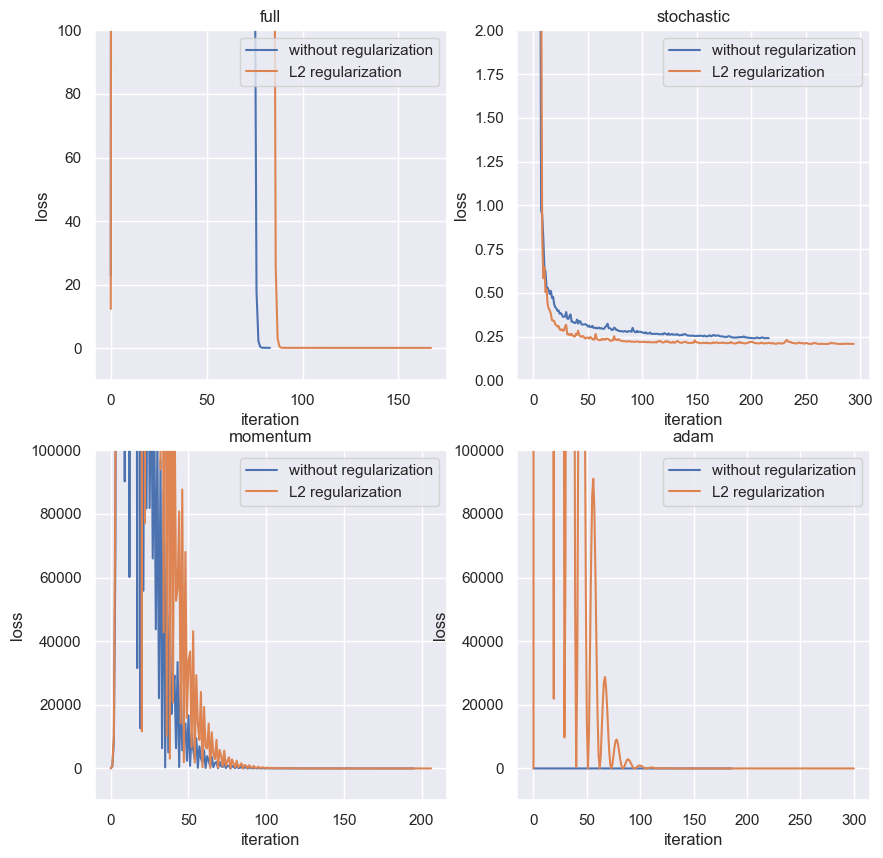

In [46]:
plt.figure(figsize=(10, 10))
ylims = {method: [-10_000, 100_000] for method in methods}
ylims['full'][0] = -10
ylims['full'][1] = 100
ylims['stochastic'][0] = 0
ylims['stochastic'][1] = 2

for i, method in enumerate(methods):
    plt.subplot(2, 2, i + 1)
    plt.title(method)
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.plot(models[method]['model'].loss_history, label='without regularization')
    plt.plot(models_l2[method]['model'].loss_history, label='L2 regularization')
    plt.ylim(ylims[method][0], ylims[method][1])
    plt.legend()

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$
    \frac{\partial}{\partial w}L(y,w,x)=\tanh(\langle w,x\rangle-y)x
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [78]:
from descents import get_descent, LossFunction
from linear_regression import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm

lambdas = np.logspace(-5, 4, 128)
methods = ['full', 'stochastic', 'momentum', 'adam']
models_logcosh = {name: {'score': 0, 'model': None, 'lambda': 0, 'iter': 0} for name in methods}

X_train_tr = column_transformer.fit_transform(X_train)
y_train_tr = scaler.fit_transform(y_train)
X_val_tr = column_transformer.transform(X_val)
y_val_tr = scaler.transform(y_val)
X_test_tr = column_transformer.transform(X_test)
y_test_tr = scaler.transform(y_test)

for method in tqdm(methods):
    print(method)
    for lambda_ in lambdas:
        model = LinearRegression({'descent_name': method,
                                'kwargs': {
                                    'dimension': X_train_tr.shape[1],
                                    'lambda_': lambda_,
                                    'loss_function': LossFunction.LogCosh
                                }}, max_iter=400)
        model.fit(X_train_tr, y_train_tr)
        y_pred_val = model.predict(X_val_tr)
        if not (np.isnan(y_pred_val) | np.isinf(y_pred_val)).any():
            score = r2_score(y_val_tr, y_pred_val)
            print(lambda_, score, model.i) #np.square(model.loss_history[-1]).mean())
            if score > models_logcosh[method]['score']:
                models_logcosh[method]['score'] = score
                models_logcosh[method]['model'] = model
                models_logcosh[method]['lambda'] = lambda_
                models_logcosh[method]['iter'] = model.i

  0%|                                                    | 0/4 [00:00<?, ?it/s]

full
1e-05 -19.9560626139231 1
1.177243067676929e-05 -20.050751047233973 1
1.3859012403933868e-05 -29.119622359647295 1
1.631542627737972e-05 -19.567148207887243 1
1.9207222481239318e-05 -16.02165718515797 1
2.2611569515367453e-05 -21.486834050785546 1
2.6619313461261315e-05 -24.301318455325905 1
3.1337402238589044e-05 -20.500517547466192 1
3.6891739544382435e-05 -24.87417235865022 1
4.343054463316705e-05 -14.409546668376388 1
5.112830759482937e-05 -16.77366608532634 1
6.019044567806669e-05 -20.70121931270685 1
7.085878491488879e-05 -9.548713109484236 1
8.341801332506339e-05 -16.93823858388107 1
9.820327790631257e-05 -14.39161076466475 1
0.00011560912813835741 -22.16155518437534 1
0.00013610004466105507 -12.709060545936403 1
0.0001602228340877477 -13.004698434442094 1
0.00018862122071335174 -24.0814179311289 1
0.00022205302450155356 -12.360995368757706 1
0.00026141038375114924 -17.240297203013306 1
0.0003077435620898062 -20.558660168586748 1
0.00036228897509242895 -12.560291457673936 1

 25%|██████████▊                                | 1/4 [04:32<13:36, 272.06s/it]

10000.0 -76675.108759592 400
stochastic
1e-05 -23.650069592011796 1
1.177243067676929e-05 -24.747586189543483 1
1.3859012403933868e-05 -14.337005176942283 1
1.631542627737972e-05 -17.11927398701618 1
1.9207222481239318e-05 -11.205794213843868 1
2.2611569515367453e-05 -19.976971140605134 1
2.6619313461261315e-05 -17.49954995728464 1
3.1337402238589044e-05 -20.102631437693294 1
3.6891739544382435e-05 -10.543060472176723 1
4.343054463316705e-05 -16.848386170362446 1
5.112830759482937e-05 -20.654197726420097 1
6.019044567806669e-05 -18.985208533526304 1
7.085878491488879e-05 -17.805410036665858 1
8.341801332506339e-05 -21.51509454492808 1
9.820327790631257e-05 -18.15688795968413 1
0.00011560912813835741 -16.31880590303248 1
0.00013610004466105507 -15.469520001139777 1
0.0001602228340877477 -19.027649672976704 1
0.00018862122071335174 -13.697709060335063 1
0.00022205302450155356 -20.389072085481416 1
0.00026141038375114924 -9.92285797549771 1
0.0003077435620898062 -13.219946356451798 1
0.00

 50%|█████████████████████▌                     | 2/4 [07:35<07:20, 220.01s/it]

10000.0 -768101.2246021869 400
momentum
1e-05 -11.950123107741277 1
1.177243067676929e-05 -18.50726669365882 1
1.3859012403933868e-05 -22.15091296800665 1
1.631542627737972e-05 -28.309143775807065 1
1.9207222481239318e-05 -21.744575977134037 1
2.2611569515367453e-05 -14.683771315343215 1
2.6619313461261315e-05 -16.53149666394436 1
3.1337402238589044e-05 -14.792324931415745 1
3.6891739544382435e-05 -16.52800265166353 1
4.343054463316705e-05 -12.420936980018253 1
5.112830759482937e-05 -17.665511454854702 1
6.019044567806669e-05 -15.012416579876046 1
7.085878491488879e-05 -18.611523860485953 1
8.341801332506339e-05 -26.200194807801914 1
9.820327790631257e-05 -13.141182288129865 1
0.00011560912813835741 -16.8842113949843 1
0.00013610004466105507 -15.168454604929405 1
0.0001602228340877477 -19.583803217866535 1
0.00018862122071335174 -15.520037674538205 1
0.00022205302450155356 -16.319995491972836 1
0.00026141038375114924 -16.666410726159253 1
0.0003077435620898062 -22.93151424759394 1
0.00

 75%|████████████████████████████████▎          | 3/4 [12:43<04:20, 260.26s/it]

10000.0 -4283030.550478199 400
adam
1e-05 -11.727313038244047 1
1.177243067676929e-05 -16.420398751476743 1
1.3859012403933868e-05 -21.695145515644576 1
1.631542627737972e-05 -22.715093539974134 1
1.9207222481239318e-05 -17.73773070424139 1
2.2611569515367453e-05 -20.655227770701757 1
2.6619313461261315e-05 -15.968349501312204 1
3.1337402238589044e-05 -19.27251308188427 1
3.6891739544382435e-05 -15.10301348378497 1
4.343054463316705e-05 -21.029444771788462 1
5.112830759482937e-05 -18.82655262031372 1
6.019044567806669e-05 -16.14871353413791 1
7.085878491488879e-05 -19.39954234555201 1
8.341801332506339e-05 -13.66437392567161 1
9.820327790631257e-05 -17.557372294736687 1
0.00011560912813835741 -19.37429747981938 1
0.00013610004466105507 -16.369175087629678 1
0.0001602228340877477 -19.59564109253232 1
0.00018862122071335174 -8.843168866938925 1
0.00022205302450155356 -18.353688128061073 1
0.00026141038375114924 -17.51789473210659 1
0.0003077435620898062 -26.105073175266035 1
0.0003622889

100%|███████████████████████████████████████████| 4/4 [18:51<00:00, 282.93s/it]

10000.0 -53895.959632164835 400


In [47]:
for method in methods:
    print(method)
    model = models_logcosh[method]['model']
    y_pred_test = model.predict(X_test_tr)
    print(r2_score(y_test_tr, y_pred_test))

full
0.8280188367993828
stochastic
0.830758569957693
momentum
0.8643280903200139
adam
0.8669286755762813


MSE:

full \
0.7954152721294845 \
stochastic \
0.7652612966943313 \
momentum \
0.8588703716213755 \
adam \
0.8628470012202296

In [133]:
models_logcosh['adam']

{'score': 0.8694032038009074,
 'model': <linear_regression.LinearRegression at 0x29e530f43d0>,
 'lambda': 17.227429147699407,
 'iter': 172}

In [136]:
models_huber['adam']

{'score': 0.8694884241426409,
 'model': <linear_regression.LinearRegression at 0x29df09eb010>,
 'lambda': 28.10728502080728,
 'iter': 255}

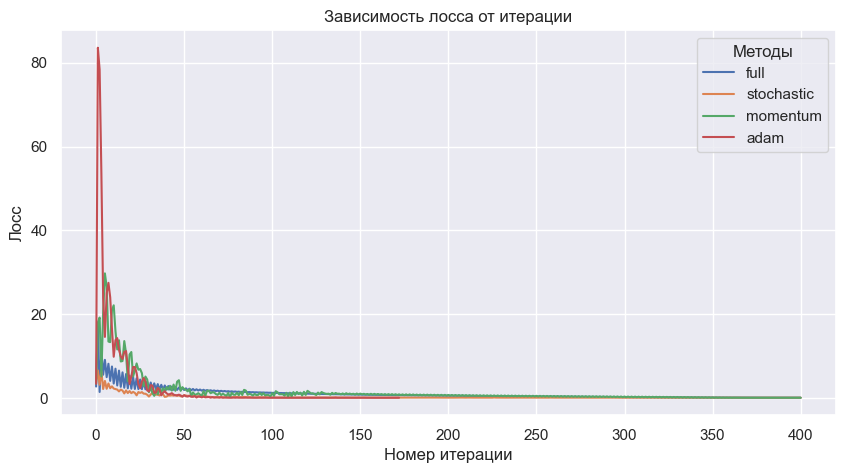

In [83]:
plt.figure(figsize=(10, 5))
plt.title('Зависимость лосса от итерации')
plt.xlabel('Номер итерации')
plt.ylabel('Лосс')
# plt.xlim(0, 300)
# plt.ylim(-0.01, 0.5)

for method in methods:
    model = models_logcosh[method]['model']
    plt.plot(model.loss_history, label=method)

plt.legend(title='Методы')

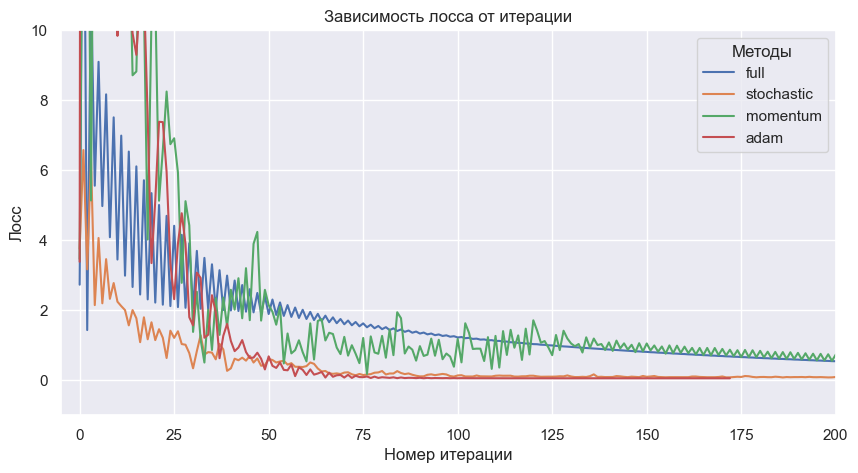

In [88]:
plt.figure(figsize=(10, 5))
plt.title('Зависимость лосса от итерации')
plt.xlabel('Номер итерации')
plt.ylabel('Лосс')
plt.xlim(-5, 200)
plt.ylim(-1, 10)

for method in methods:
    model = models_logcosh[method]['model']
    plt.plot(model.loss_history, label=method)

plt.legend(title='Методы')

In [90]:
!pip install statsmodels

     ---------------------------------------- 9.9/9.9 MB 10.0 MB/s eta 0:00:00
     ------------------------------------- 233.9/233.9 kB 14.0 MB/s eta 0:00:00


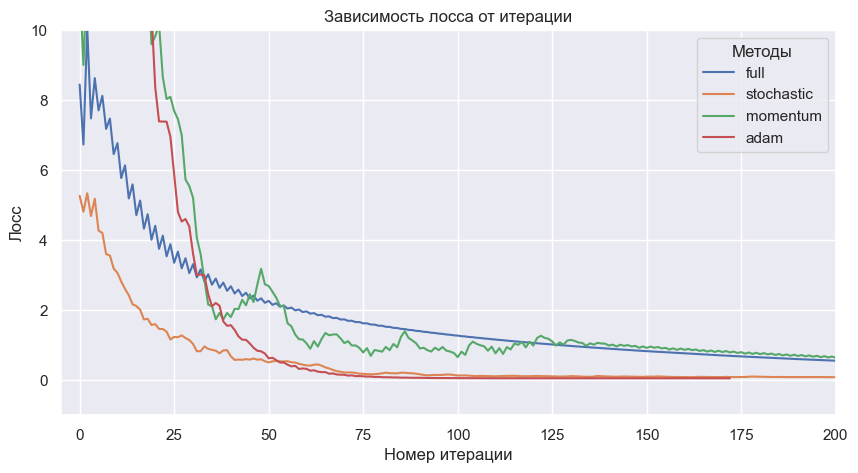

In [118]:
from statsmodels.tsa.api import SimpleExpSmoothing

plt.figure(figsize=(10, 5))
plt.title('Зависимость лосса от итерации')
plt.xlabel('Номер итерации')
plt.ylabel('Лосс')
plt.xlim(-5, 200)
plt.ylim(-1, 10)

smoothed_loss = {model_name: 0 for model_name in  methods}

for method in methods:
    smoothed_loss[method] = SimpleExpSmoothing(models_logcosh[method]['model'].loss_history, 
                                               initialization_method="heuristic").fit(smoothing_level=0.3, 
                                                                                      optimized=False)
    # plt.plot(models_logcosh['full']['model'].loss_history)
    plt.plot(smoothed_loss[method].fittedvalues, label=method)

plt.legend(title='Методы')
    
# fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

# plt.figure(figsize=(12, 8))
# plt.plot(models_logcosh['full']['model'].loss_history)
# plt.plot(smoothed_loss['full'].fittedvalues)
# (line1,) = plt.plot(fcast1, marker="o", color="blue")
# plt.plot(fit2.fittedvalues, marker="o", color="red")
# (line2,) = plt.plot(fcast2, marker="o", color="red")
# plt.plot(fit3.fittedvalues, marker="o", color="green")
# (line3,) = plt.plot(fcast3, marker="o", color="green")

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [76]:
from descents import get_descent, LossFunction
from linear_regression import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm

lambdas = np.logspace(-5, 4, 128)
# methods = ['adamax']
models_adamax = {'adamax': {'score': 0, 'model': None, 'lambda': 0, 'iter': 0}}

# X_train_tr = column_transformer.fit_transform(X_train)
# y_train_tr = scaler.fit_transform(y_train)
# X_val_tr = column_transformer.transform(X_val)
# y_val_tr = scaler.transform(y_val)
# X_test_tr = column_transformer.transform(X_test)
# y_test_tr = scaler.transform(y_test)

for method in ['adamax']:
    print(method)
    for lambda_ in lambdas:
        model = LinearRegression({'descent_name': method,
                                'kwargs': {
                                    'dimension': X_train_tr.shape[1],
                                    'lambda_': lambda_,
                                    'loss_function': LossFunction.LogCosh
                                }}, max_iter=400)
        model.fit(X_train_tr, y_train_tr)
        y_pred_val = model.predict(X_val_tr)
        if not (np.isnan(y_pred_val) | np.isinf(y_pred_val)).any():
            score = r2_score(y_val_tr, y_pred_val)
            print(lambda_, score, model.i) #np.square(model.loss_history[-1]).mean())
            if score > models_adamax['adamax']['score']:
                models_adamax[method]['score'] = score
                models_adamax[method]['model'] = model
                models_adamax[method]['lambda'] = lambda_
                models_adamax[method]['iter'] = model.i

adamax
1e-05 -10.920961137482221 1
1.177243067676929e-05 -17.19473014164529 1
1.3859012403933868e-05 -14.8407899508623 1
1.631542627737972e-05 -26.695111729274085 1
1.9207222481239318e-05 -18.99569365423184 1
2.2611569515367453e-05 -8.19956191969454 1
2.6619313461261315e-05 -15.01225950388724 1
3.1337402238589044e-05 -17.81907664665336 1
3.6891739544382435e-05 -17.310194370642265 1
4.343054463316705e-05 -15.792765341757832 1
5.112830759482937e-05 -12.306170367516916 1
6.019044567806669e-05 -13.957514587076572 1
7.085878491488879e-05 -22.174943952268695 1
8.341801332506339e-05 -14.650422301693862 1
9.820327790631257e-05 -16.44430584036083 1
0.00011560912813835741 -17.638952702903993 1
0.00013610004466105507 -9.355421902827654 1
0.0001602228340877477 -13.912999751315636 1
0.00018862122071335174 -19.444198750681622 1
0.00022205302450155356 -17.61540625650869 1
0.00026141038375114924 -18.28691586990213 1
0.0003077435620898062 -16.366635466045057 1
0.00036228897509242895 -24.055911528542136

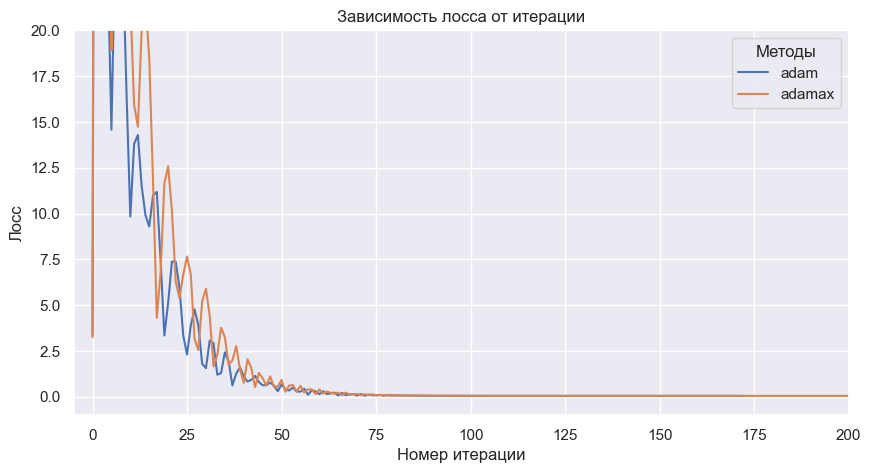

In [139]:
plt.figure(figsize=(10, 5))
plt.title('Зависимость лосса от итерации')
plt.xlabel('Номер итерации')
plt.ylabel('Лосс')
plt.xlim(-5, 200)
plt.ylim(-1, 20)

plt.plot(models_logcosh['adam']['model'].loss_history, label='adam')
plt.plot(models_adamax['adamax']['model'].loss_history, label='adamax')

plt.legend(title='Методы')

In [53]:
for method in ['adamax']:
    print(method)
    model = models_adamax[method]['model']
    y_pred_test = model.predict(X_test_tr)
    print(r2_score(y_test_tr, y_pred_test))

adamax
0.8668980886085061


### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:



Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [62]:
from descents import get_descent, LossFunction
from linear_regression import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm

lambdas = np.logspace(-5, 4, 128)
methods = ['full', 'stochastic', 'momentum', 'adam']
models_mae = {name: {'score': 0, 'model': None, 'lambda': 0, 'iter': 0} for name in methods}

# X_train_tr = column_transformer.fit_transform(X_train)
# y_train_tr = scaler.fit_transform(y_train)
# X_val_tr = column_transformer.transform(X_val)
# y_val_tr = scaler.transform(y_val)
# X_test_tr = column_transformer.transform(X_test)
# y_test_tr = scaler.transform(y_test)

for method in methods:
    print(method)
    for lambda_ in lambdas:
        model = LinearRegression({'descent_name': method,
                                'kwargs': {
                                    'dimension': X_train_tr.shape[1],
                                    'lambda_': lambda_,
                                    'loss_function': LossFunction.MAE
                                }}, max_iter=400)
        model.fit(X_train_tr, y_train_tr)
        y_pred_val = model.predict(X_val_tr)
        if not (np.isnan(y_pred_val) | np.isinf(y_pred_val)).any():
            score = r2_score(y_val_tr, y_pred_val)
            print(lambda_, score, model.i) #np.square(model.loss_history[-1]).mean())
            if score > models_mae[method]['score']:
                models_mae[method]['score'] = score
                models_mae[method]['model'] = model
                models_mae[method]['lambda'] = lambda_
                models_mae[method]['iter'] = model.i

full
1e-05 -19.895446226722367 1
1.177243067676929e-05 -14.44250072596337 1
1.3859012403933868e-05 -20.78296083739785 1
1.631542627737972e-05 -19.40410174270906 1
1.9207222481239318e-05 -12.884660189777774 1
2.2611569515367453e-05 -18.950358286920796 1
2.6619313461261315e-05 -12.829367841957875 1
3.1337402238589044e-05 -21.01310814597228 1
3.6891739544382435e-05 -24.403945912544618 1
4.343054463316705e-05 -13.681586706268261 1
5.112830759482937e-05 -11.184864911349207 1
6.019044567806669e-05 -18.31380491096172 1
7.085878491488879e-05 -16.604181819379594 1
8.341801332506339e-05 -13.814436885694573 1
9.820327790631257e-05 -17.007811208609244 1
0.00011560912813835741 -22.71054557947437 1
0.00013610004466105507 -27.524263906960954 1
0.0001602228340877477 -21.45233271253031 1
0.00018862122071335174 -21.31409028547322 1
0.00022205302450155356 -20.629157560024133 1
0.00026141038375114924 -19.720716960466273 1
0.0003077435620898062 -16.34834993719582 1
0.00036228897509242895 -19.18858534425065

In [61]:
from descents import get_descent, LossFunction
from linear_regression import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm

lambdas = np.logspace(-5, 4, 128)
methods = ['full', 'stochastic', 'momentum', 'adam']
models_huber = {name: {'score': 0, 'model': None, 'lambda': 0, 'iter': 0} for name in methods}

# X_train_tr = column_transformer.fit_transform(X_train)
# y_train_tr = scaler.fit_transform(y_train)
# X_val_tr = column_transformer.transform(X_val)
# y_val_tr = scaler.transform(y_val)
# X_test_tr = column_transformer.transform(X_test)
# y_test_tr = scaler.transform(y_test)

for method in methods:
    print(method)
    for lambda_ in lambdas:
        model = LinearRegression({'descent_name': method,
                                'kwargs': {
                                    'dimension': X_train_tr.shape[1],
                                    'lambda_': lambda_,
                                    'loss_function': LossFunction.Huber
                                }}, max_iter=400)
        model.fit(X_train_tr, y_train_tr)
        y_pred_val = model.predict(X_val_tr)
        if not (np.isnan(y_pred_val) | np.isinf(y_pred_val)).any():
            score = r2_score(y_val_tr, y_pred_val)
            print(lambda_, score, model.i) #np.square(model.loss_history[-1]).mean())
            if score > models_huber[method]['score']:
                models_huber[method]['score'] = score
                models_huber[method]['model'] = model
                models_huber[method]['lambda'] = lambda_
                models_huber[method]['iter'] = model.i

full
1e-05 -17.12082117950245 1
1.177243067676929e-05 -25.423485864992212 1
1.3859012403933868e-05 -19.45672321828922 1
1.631542627737972e-05 -16.673596731531287 1
1.9207222481239318e-05 -23.151704819766515 1
2.2611569515367453e-05 -12.04459648450111 1
2.6619313461261315e-05 -10.152282478015769 1
3.1337402238589044e-05 -19.033449958987443 1
3.6891739544382435e-05 -14.855468688132323 1
4.343054463316705e-05 -19.66086965408051 1
5.112830759482937e-05 -25.5885758589698 1
6.019044567806669e-05 -18.806218984026838 1
7.085878491488879e-05 -10.207808654036645 1
8.341801332506339e-05 -12.633528474163159 1
9.820327790631257e-05 -22.80988250503822 1
0.00011560912813835741 -13.644833125754527 1
0.00013610004466105507 -19.82526498344925 1
0.0001602228340877477 -22.27108817244289 1
0.00018862122071335174 -17.70014009937164 1
0.00022205302450155356 -8.597009678353684 1
0.00026141038375114924 -20.924746961329674 1
0.0003077435620898062 -20.599877181798536 1
0.00036228897509242895 -15.042377207058902 

In [65]:
print('MAE:')
for method in methods:
    print(method)
    model = models_mae[method]['model']
    y_pred_test = model.predict(X_test_tr)
    print(r2_score(y_test_tr, y_pred_test))

MAE:
full
0.8178279379013023
stochastic
0.8121153433468686
momentum
0.856175921237411
adam
0.860079374531354


In [125]:
print('Huber:')
for method in methods:
    print(method)
    model = models_huber[method]['model']
    y_pred_test = model.predict(X_test_tr)
    print(r2_score(y_test_tr, y_pred_test))

Huber:
full
0.8302576423277428
stochastic
0.8279788695903413
momentum
0.8643697077054185
adam
0.8671808151370276


In [126]:
all_models_str = ['MSE', 'LogCosh', 'MAE', 'Huber', 'MSE L2']
all_models = {'MSE': models, 'MSE L2': models_l2, 'LogCosh': models_logcosh, 'MAE': models_mae, 
              'Huber': models_huber}
d = {m: [] for m in all_models_str}

for m in all_models_str:
    for method in methods:
        model = all_models[m][method]['model']
        y_pred_test = model.predict(X_test_tr)
        d[m].append(r2_score(y_test_tr, y_pred_test))

In [127]:
table = pd.DataFrame(d, index=methods)
table

MSE   LogCosh       MAE     Huber    MSE L2
full        0.799647  0.834716  0.817828  0.830258  0.827447
stochastic  0.758412  0.833021  0.812115  0.827979  0.790590
momentum    0.857705  0.863910  0.856176  0.864370  0.857975
adam        0.862139  0.866976  0.860079  0.867181  0.863027

In [130]:
for method in ['adamax']:
    print(method + ' LogCosh')
    model = models_adamax[method]['model']
    y_pred_test = model.predict(X_test_tr)
    print(r2_score(y_test_tr, y_pred_test))

adamax LogCosh
0.8668339983596114


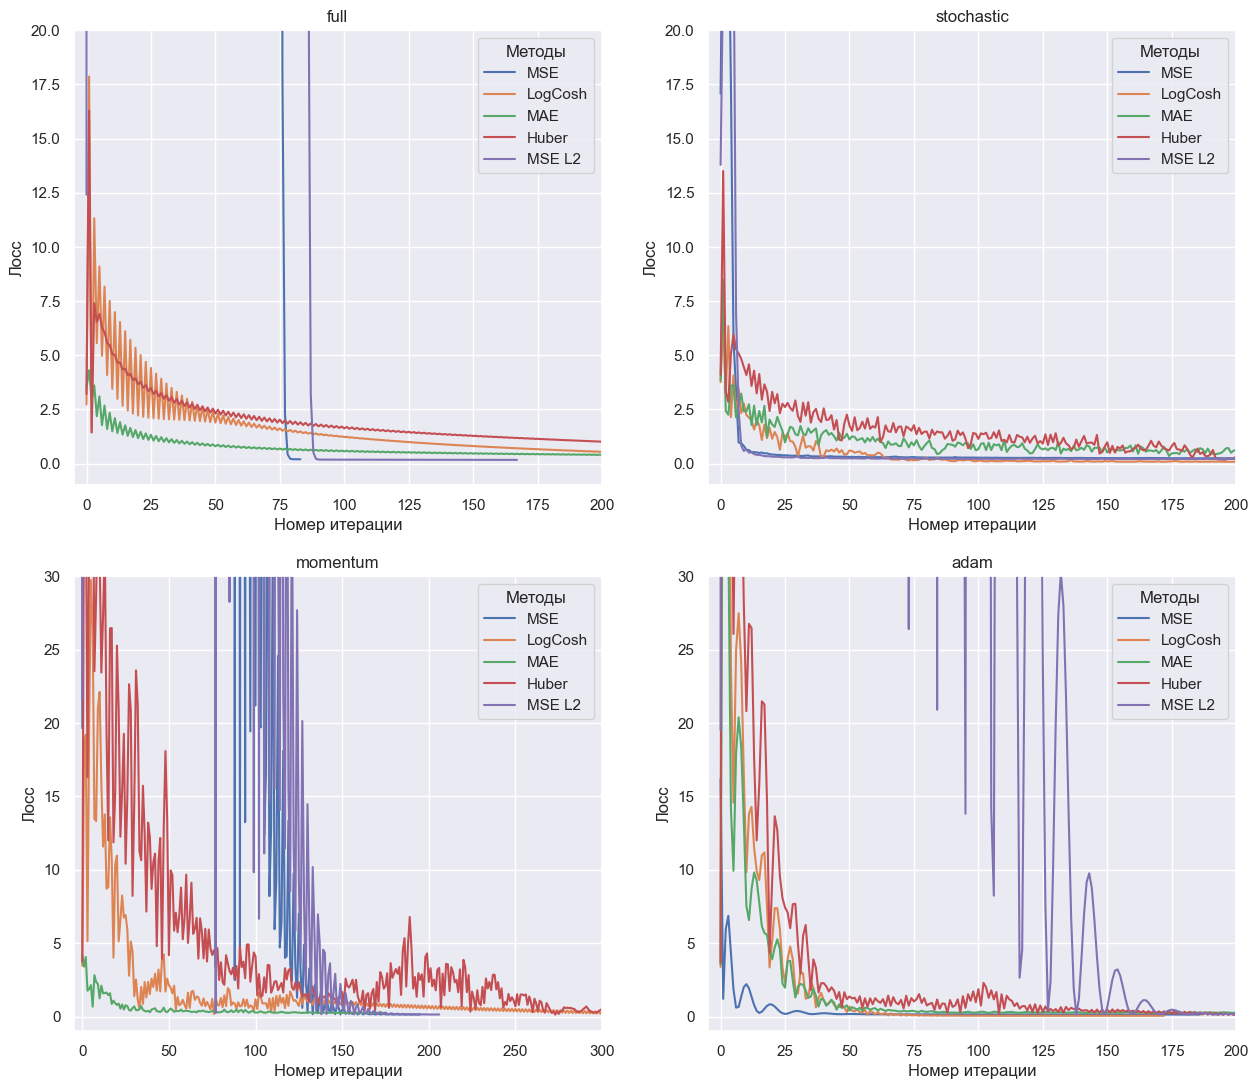

In [147]:
plt.figure(figsize=(15, 13))

plt.subplot(2, 2, 1)
plt.title('full')
plt.xlabel('Номер итерации')
plt.ylabel('Лосс')
plt.xlim(-5, 200)
plt.ylim(-1, 20)

for m in all_models_str:
    plt.plot(all_models[m]['full']['model'].loss_history, label=m)

plt.legend(title='Методы')

plt.subplot(2, 2, 2)
plt.title('stochastic')
plt.xlabel('Номер итерации')
plt.ylabel('Лосс')
plt.xlim(-5, 200)
plt.ylim(-1, 20)

for m in all_models_str:
    plt.plot(all_models[m]['stochastic']['model'].loss_history, label=m)

plt.legend(title='Методы')

plt.subplot(2, 2, 3)
plt.title('momentum')
plt.xlabel('Номер итерации')
plt.ylabel('Лосс')
plt.xlim(-5, 300)
plt.ylim(-1, 30)

for m in all_models_str:
    plt.plot(all_models[m]['momentum']['model'].loss_history, label=m)

plt.legend(title='Методы')

plt.subplot(2, 2, 4)
plt.title('adam')
plt.xlabel('Номер итерации')
plt.ylabel('Лосс')
plt.xlim(-5, 200)
plt.ylim(-1, 30)

for m in all_models_str:
    plt.plot(all_models[m]['adam']['model'].loss_history, label=m)

plt.legend(title='Методы')